In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-financial-statements/Shariah - Financial Statements/HD_New York Stock Exchange_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/LII_New York Stock Exchange_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/BCPC_NASDAQ Global Select_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/MAYS_NASDAQ Capital Market_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/DHI_New York Stock Exchange_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/TSCO_NASDAQ Global Select_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/PKG_New York Stock Exchange_quarterly_financials_FRC.csv
/kaggle/input/final-financial-statements/Shariah - Financial Statements/AVY_New York Stock Exchange_qua

### Data Preparation

In [2]:
def parse_quarter(date_string):
    try:
        year, quarter = date_string.split()
        quarter_dict = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
        return pd.to_datetime(f"{year}-{quarter_dict[quarter]}")
    except:
        # Return NaT (Not a Time) for any problematic date strings
        return pd.NaT

In [3]:
#Get list of stocks and its sectors
stocks = ['MGEE',
'AWR',
'MNTK',
'AAPL',
'NVDA',
'QCOM',
'MRVL',
'ADSK',
'TYL',
'TER',
'CDNS',
'IT',
'CRM',
'COR',
'WHLR',
'EQR',
'WY',
'MAYS',
'ELS',
'CPT',
'CUBE',
'TRNO',
'RYN',
'LIN',
'SHW',
'ARCH',
'ECL',
'AVY',
'DD',
'NEU',
'PKG',
'RS',
'PPG',
'UNP',
'ETN',
'CTAS',
'ITW',
'FAST',
'ODFL',
'ROL',
'LII',
'WM',
'TT',
'LLY',
'JNJ',
'ZTS',
'MCK',
'IDXX',
'RMD',
'MTD',
'ILMN',
'MRK',
'ABT',
'SPGI',
'MCO',
'MA',
'MSCI',
'XOM',
'CVX',
'DMLP',
'DINO',
'CTRA',
'DVN',
'HAL',
'PNRG',
'HES',
'VLO',
'PG',
'KO',
'HSY',
'JBSS',
'CHD',
'CL',
'LANC',
'FIZZ',
'IPAR',
'WDFC',
'HD',
'DHI',
'TJX',
'ORLY',
'TSCO',
'WSM',
'ULTA',
'FND',
'GNTX',
'FIVE',
'UI',
'SPOK',
'MSI',
'FFIV',
'TZOO',
'CALX',
'EXTR',
'DHX',
'DGII',
'MCHX']

sectors = ['Utilities',
'Utilities',
'Utilities',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Technology',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Real Estate',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Materials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'Industrials',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'HealthCare',
'Financials',
'Financials',
'Financials',
'Financials',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Energy',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Staples',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Consumer Discretionary',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services',
'Communication Services']


sector_dict = dict(zip(stocks,sectors))

In [4]:
#Install yahoo finance
!pip install yfinance

#Load Stock data

import yfinance as yf

start = '2001-01-01'
end = '2024-06-30'

stock_df = pd.DataFrame()
stock_df_volume = pd.DataFrame()
for stock in sector_dict.keys():
    df = yf.download([stock],start = start, end = end)
    stock_df[stock] = df['Close']
    stock_df_volume[stock] = df['Volume']

stock_df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 16.8 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=317865 sha256=43e57493c1adf31e1f289f1297a701bfac68ebfe9efb00b674b5c8215171a56b
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,MGEE,AWR,MNTK,AAPL,NVDA,QCOM,MRVL,ADSK,TYL,TER,...,UI,SPOK,MSI,FFIV,TZOO,CALX,EXTR,DHX,DGII,MCHX
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,14.416667,11.604167,NaN,0.265625,0.124740,35.437500,5.343750,6.421875,1.750000,37.500000,...,NaN,NaN,73.265259,5.125000,NaN,NaN,27.6250,NaN,6.250000,NaN
2001-01-03,15.500000,11.562500,NaN,0.292411,0.163021,42.031250,5.421875,6.828125,1.812500,39.500000,...,NaN,NaN,87.285156,6.500000,NaN,NaN,40.5625,NaN,6.437500,NaN
2001-01-04,14.625000,11.312500,NaN,0.304688,0.181771,39.468750,6.062500,7.328125,1.750000,39.375000,...,NaN,NaN,83.440987,7.375000,NaN,NaN,37.7500,NaN,6.875000,NaN
2001-01-05,14.416667,10.958333,NaN,0.292411,0.154557,36.531250,5.625000,7.250000,1.750000,36.437500,...,NaN,NaN,76.657173,5.843750,NaN,NaN,36.0625,NaN,6.875000,NaN
2001-01-08,14.083333,11.208333,NaN,0.295759,0.169271,38.937500,5.703125,7.203125,1.812500,39.625000,...,NaN,NaN,78.692314,5.406250,NaN,NaN,34.3750,NaN,6.562500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,76.779999,72.779999,5.44,208.139999,118.110001,200.839996,67.769997,239.169998,491.570007,145.529999,...,141.740005,14.39,388.160004,168.679993,7.82,35.680000,12.8300,2.14,22.440001,1.50
2024-06-25,75.599998,71.769997,5.49,209.070007,126.089996,202.169998,68.260002,242.529999,488.239990,147.570007,...,142.759995,14.46,390.359985,169.539993,7.84,35.570000,12.7900,2.35,22.219999,1.51
2024-06-26,75.739998,71.800003,5.54,213.250000,126.400002,197.330002,68.269997,243.279999,488.630005,146.869995,...,143.830002,14.71,384.230011,169.259995,7.81,34.570000,13.0400,2.28,22.270000,1.50


In [5]:
#Reset index

stock_df.reset_index(inplace = True)

stock_df = stock_df.melt(id_vars = ['Date'], var_name = 'Stock ID', value_name = 'Close Price')

stock_df_volume.reset_index(inplace=True)
stock_df_volume = stock_df_volume.melt(id_vars=['Date'], var_name='Stock ID', value_name='Volume')

stock_df = pd.merge(stock_df, stock_df_volume, on=['Date', 'Stock ID'])
stock_df.head()

,Date,Stock ID,Close Price,Volume
0,2001-01-02,MGEE,14.416667,60750.0
1,2001-01-03,MGEE,15.500000,63300.0
2,2001-01-04,MGEE,14.625000,72600.0
3,2001-01-05,MGEE,14.416667,29850.0
4,2001-01-08,MGEE,14.083333,62700.0


In [6]:
#Calculate next quarter price and next year price
import numpy as np
stock_df['Next Year Price'] = stock_df.groupby('Stock ID')['Close Price'].shift(-252)

stock_df['Date'] = stock_df['Date'].dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

### Dowmload Financial data and financial ratios

In [7]:
#Get financial data

path = '/kaggle/input/final-financial-statements/Shariah - Financial Statements/'

files = os.listdir(path)

dataframes = []

for file in files:
    if file.endswith('.csv') and file.split('_')[0] in sector_dict:
        stock_id = file.split('_')[0]
        file_path = os.path.join(path,file)
        df = pd.read_csv(file_path)
        df = df.transpose() #transpose the csv file into a better format
        df.index = df.index.map(parse_quarter)#turn the quarter information into the correct format
        df.columns = df.iloc[0] #set the first column into the first row
        df = df.drop(df.index[0])
        df = df.loc[df.index.year >= 1990] #filter for 2002 onwards
        df = df.iloc[:,:-2] #remove the last two columns
        df['Stock ID'] = stock_id #add stock id as information
        df['Sector'] = sector_dict.get(stock_id, 'Unknown')
        df.reset_index(inplace = True)
        dataframes.append(df) #append to dataframes
        
financials_df = pd.concat(dataframes)

financials_df

NaT,index,Sales/Revenue/Turnover,Sales & Services Revenue,Cost of Revenue,Cost of Goods & Services,Gross Profit,Other Operating Income,Operating Expenses,"Selling, General & Admin",Research & Development,...,EBITDA Margin (%),Net Cash Paid for Acquisitions,Free Cash Flow,Free Cash Flow to Firm,Free Cash Flow to Equity,Free Cash Flow per Basic Share,Price/Free Cash Flow,Cash Flow to Net Income,Stock ID,Sector
0,1995-09-30,3240100000.0,3240100000.0,2328100000.0,2328100000.0,912000000.0,0.0,680600000.0,649200000.0,0.0,...,8.93751,0.0,-84600000.0,-84600000.0,-59100000.0,-0.04206,6.423674,1.365767,HD,Consumer Discretionary
1,1995-12-31,3077500000.0,3077500000.0,2141700000.0,2141700000.0,935800000.0,0.0,698900000.0,663500000.0,0.0,...,8.951085,0.0,-395100000.0,-395100000.0,-386700000.0,0.0,7.545883,-0.65411,HD,Consumer Discretionary
2,1996-03-31,3569000000.0,3569000000.0,2532100000.0,2532100000.0,1036900000.0,0.0,782700000.0,743400000.0,0.0,...,8.761462,0.0,146300000.0,146300000.0,156400000.0,0.07417,5.078573,3.12801,HD,Consumer Discretionary
3,1996-06-30,4151700000.0,4151700000.0,2985500000.0,2985500000.0,1166200000.0,0.0,824100000.0,780900000.0,0.0,...,8.664154,0.0,-84600000.0,-84600000.0,-80300000.0,-0.039737,4.855404,1.160639,HD,Consumer Discretionary
4,1996-09-30,3997800000.0,3997800000.0,2874300000.0,2874300000.0,1123500000.0,0.0,843200000.0,796300000.0,0.0,...,8.639497,0.0,-166000000.0,-166000000.0,-156400000.0,-0.085128,4.388917,0.556695,HD,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-09-30,3836000000.0,3836000000.0,2568000000.0,2568000000.0,1268000000.0,0.0,102000000.0,99000000.0,0.0,...,48.832079,0.0,1702000000.0,1781813432.835821,1461000000.0,2.6719,4.357143,1.895604,DVN,Energy
116,2023-12-31,4145000000.0,4145000000.0,2502000000.0,2502000000.0,1643000000.0,0.0,123000000.0,111000000.0,0.0,...,49.056233,0.0,1727000000.0,1797634265.734266,1730000000.0,0.0,3.231113,1.507812,DVN,Energy
117,2024-03-31,3596000000.0,3596000000.0,2606000000.0,2606000000.0,990000000.0,0.0,123000000.0,114000000.0,0.0,...,47.621582,0.0,1730000000.0,1798988281.25,1747000000.0,2.750397,3.545911,2.916107,DVN,Energy
118,2024-06-30,3917000000.0,3917000000.0,2664000000.0,2664000000.0,1253000000.0,0.0,117000000.0,114000000.0,0.0,...,48.276752,0.0,1453000000.0,1525346153.846153,1454000000.0,2.321086,3.256222,1.81872,DVN,Energy


In [8]:
#get ratio data

path = '/kaggle/input/final-ratios/Shariah - Ratios/'

files = os.listdir(path)

ratios_dataframe = []

for file in files:
    if file.endswith('.csv') and file.split('_')[0] in sector_dict:
        stock_id = file.split('_')[0]
        file_path = os.path.join(path,file)
        df = pd.read_csv(file_path)
        df = df.transpose() #transpose the csv file into a better format
        # print(df.head())
        df.index = df.index.map(parse_quarter)#turn the quarter information into the correct format
        # print(df.head())
        df.columns = df.iloc[0] #set the first column into the first row
        # print(df.head())
        df = df.drop(df.index[0])
        df = df.loc[df.index.year >= 1990] #filter for 2002 onwards
        df = df.iloc[:,:-2] #remove the last two columns
        df['Stock ID'] = stock_id #add stock id as information
        df['Sector'] = sector_dict.get(stock_id, 'Unknown')
        df.reset_index(inplace = True)
        ratios_dataframe.append(df) #append to dataframes
        
ratios_df = pd.concat(ratios_dataframe)

ratios_df

NaT,index,Return on Common Equity (%),Return on Assets (%),Return on Capital (%),Return on Invested Capital (%),Gross Margin (%),EBITDA Margin (%),Operating Margin (%),Incremental Operating Margin (%),Pretax Margin (%),...,"Diluted EPS, GAAP",Diluted EPS from Cont Ops,Dividend per Share,Cash Flow per Share,Free Cash Flow per Basic Share,Cash & Equivalents per Share,Book Value per Share,Tangible Book Value per Share,Stock ID,Sector
0,2002-03-31,0.0,0.0,0.0,0.0,100.0,0.0,11.754468,0.0,12.548439,...,0.05,0.050016,0.0,0.0,0.0,0.425131,0.001491,0.768129,MA,Financials
1,2002-06-30,0.0,0.0,0.0,0.0,100.0,0.0,23.455467,81.362624,22.812016,...,0.078,0.078,0.0,0.043294,0.016959,0.270181,0.079086,0.646409,MA,Financials
2,2002-09-30,0.0,0.0,0.0,0.0,100.0,0.0,-22.701307,0.0,-20.633107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MA,Financials
3,2003-03-31,0.0,0.0,0.0,0.0,100.0,-25.832462,-130.367131,0.0,-129.880617,...,-0.425,-0.429944,0.0,-0.148784,-0.201321,0.141089,-0.397496,0.146104,MA,Financials
4,2003-06-30,0.0,-15.344558,-97.386327,0.0,100.0,-23.201252,8.968509,1606.394646,8.975153,...,0.032,0.032,0.0,0.194206,0.15945,0.301926,-0.361837,0.168828,MA,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2023-09-30,0.0,6.028881,22.645995,7.987494,71.051531,66.745619,47.143081,70.48508,38.477878,...,0.45376,0.455652,0.490475,0.736485,0.736485,0.035606,-5.898123,12.743075,CUBE,Real Estate
81,2023-12-31,0.0,6.545485,24.737073,8.40771,73.112306,66.898149,48.766054,-109.269357,42.673079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CUBE,Real Estate
82,2024-03-31,0.0,6.523544,23.918678,8.387991,70.529751,66.400022,45.150838,302.877118,36.287614,...,0.4172,0.41866,0.510495,0.665066,0.665066,0.024747,-6.034863,12.667941,CUBE,Real Estate
83,2024-06-30,0.0,6.478675,24.434349,8.386998,68.785052,65.760464,44.121348,-11.909223,35.380472,...,0.414636,0.415616,0.510293,0.756408,0.756408,0.025039,-6.126117,12.599364,CUBE,Real Estate


#### Introduce Important Features

In [9]:
# Essential columns for Fundamental Analysis
important_feature = [
    # Profitability
    'Return on Assets (%)',
    'Gross Margin (%)',
    'Operating Margin (%)',

    # Leverage
    'Total Debt/Equity (%)',

    # Valuation
    'Price/Earnings',
    'Price/Book Value',
    
    # Essential columns for Sharia Compliance Analysis (AAOIFI Standards)
    # Debt Ratio
    'Total Debt/Total Assets (%)',

    # Liquidity Ratio
    'Current Ratio',

    # Interest and Non-Permissible Income
    'Interest Income',
    
    #Total Income to calculate the ratio
    'Net Income, GAAP'
]


important_feature


['Return on Assets (%)',
 'Gross Margin (%)',
 'Operating Margin (%)',
 'Total Debt/Equity (%)',
 'Price/Earnings',
 'Price/Book Value',
 'Total Debt/Total Assets (%)',
 'Current Ratio',
 'Interest Income',
 'Net Income, GAAP']

### Pre-process the data, combine and drop unnecessary columns

In [10]:
#rename index to date
financials_df['Date'] = financials_df['index']

financials_df.drop('index',axis = 1, inplace = True)

#Combine Stock data and financial data

final_financial_df = pd.merge(financials_df, stock_df, on = ['Stock ID','Date'],how = 'inner')

final_financial_df.dropna(axis = 1, how = 'all', inplace = True)

final_financial_df.dropna(axis = 0, how = 'any', inplace = True)

final_financial_df

#Drop redundant columns
drop_col = ['Close Price', 'Diluted EPS, GAAP','Basic EPS from Cont Ops', 'Diluted EPS from Cont Ops']

final_financial_df.drop(drop_col, axis = 1, inplace = True)

final_financial_df

,Sales/Revenue/Turnover,Sales & Services Revenue,Cost of Revenue,Cost of Goods & Services,Gross Profit,Other Operating Income,Operating Expenses,"Selling, General & Admin",Research & Development,Other Operating Expense,...,Free Cash Flow to Firm,Free Cash Flow to Equity,Free Cash Flow per Basic Share,Price/Free Cash Flow,Cash Flow to Net Income,Stock ID,Sector,Date,Volume,Next Year Price
0,10463000000.0,10463000000.0,7245000000.0,7245000000.0,3218000000.0,0.0,2459000000.0,2459000000.0,0.0,0.0,...,-914000000.0,-885000000.0,0.0,9.013517,0.006452,HD,Consumer Discretionary,2001-12-31,3972200.0,24.020000
1,13289000000.0,13289000000.0,9279000000.0,9279000000.0,4010000000.0,0.0,2753000000.0,2753000000.0,0.0,0.0,...,373000000.0,406000000.0,0.159606,5.969724,1.547558,HD,Consumer Discretionary,2002-09-30,17984100.0,31.850000
2,13488000000.0,13488000000.0,9332000000.0,9332000000.0,4156000000.0,0.0,3004000000.0,3004000000.0,0.0,0.0,...,863000000.0,977000000.0,0.0,6.25072,2.397183,HD,Consumer Discretionary,2002-12-31,11774200.0,35.490002
3,14282000000.0,14282000000.0,9922000000.0,9922000000.0,4360000000.0,0.0,2998000000.0,2998000000.0,0.0,0.0,...,2568000000.0,2624000000.0,1.093231,5.356708,3.746495,HD,Consumer Discretionary,2003-03-31,11630500.0,37.410000
4,16277000000.0,16277000000.0,11331000000.0,11331000000.0,4946000000.0,0.0,3069000000.0,3069000000.0,0.0,0.0,...,783000000.0,749000000.0,0.332625,3.432794,1.198816,HD,Consumer Discretionary,2003-06-30,10783600.0,35.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,4273000000.0,4273000000.0,2448000000.0,2448000000.0,1825000000.0,0.0,128000000.0,95000000.0,0.0,33000000.0,...,1696696750.902527,1627000000.0,2.403875,5.102677,1.073041,DVN,Energy,2021-12-31,4895700.0,58.119999
5677,3812000000.0,3812000000.0,2431000000.0,2431000000.0,1381000000.0,0.0,103000000.0,94000000.0,0.0,9000000.0,...,1908535657.686212,1862000000.0,2.769231,5.579818,1.857432,DVN,Energy,2022-03-31,11344400.0,53.310001
5678,5626000000.0,5626000000.0,2957000000.0,2957000000.0,2669000000.0,0.0,100000000.0,84000000.0,0.0,16000000.0,...,2650238076.152305,2587000000.0,3.917933,4.126743,1.386128,DVN,Energy,2022-06-30,11855000.0,48.830002
5679,5432000000.0,5432000000.0,2841000000.0,2841000000.0,2591000000.0,0.0,104000000.0,95000000.0,0.0,9000000.0,...,-290087221.095335,-357000000.0,-0.551145,3.311664,1.111463,DVN,Energy,2022-09-30,9686600.0,45.750000


In [11]:
#rename index to date
ratios_df['Date'] = ratios_df['index']

ratios_df.drop('index',axis = 1, inplace = True)

#Combine Stock data and financial data

final_ratios_df = pd.merge(ratios_df, stock_df, on = ['Stock ID','Date'],how = 'inner')


final_ratios_df.dropna(axis = 1, how = 'all', inplace = True)

final_ratios_df.dropna(axis = 0, how = 'any', inplace = True)

# Drop duplicated columns

final_ratios_df.drop(drop_col, axis = 1, inplace = True)

final_ratios_df

,Return on Common Equity (%),Return on Assets (%),Return on Capital (%),Return on Invested Capital (%),Gross Margin (%),EBITDA Margin (%),Operating Margin (%),Incremental Operating Margin (%),Pretax Margin (%),Profit Margin (%),...,Cash Flow per Share,Free Cash Flow per Basic Share,Cash & Equivalents per Share,Book Value per Share,Tangible Book Value per Share,Stock ID,Sector,Date,Volume,Next Year Price
13,0.0,-2.169611,0.0,0.0,100.0,-36.576924,-32.364981,0.0,-30.785043,-36.6762,...,0.105688,0.086516,1.53881,-0.933877,1.213428,MA,Financials,2006-06-30,25964000.0,16.221001
14,0.0,19.147189,-415.461695,24.534544,100.0,29.642917,16.039721,1783.400571,43.538889,28.361768,...,0.0,0.0,0.0,0.0,0.0,MA,Financials,2007-12-31,13115000.0,13.909000
15,0.0,22.659649,1886.655263,27.379558,100.0,32.494498,43.618474,314.040604,58.251444,37.804251,...,0.170371,0.146231,2.026044,0.353506,1.948776,MA,Financials,2008-03-31,18218000.0,16.305000
16,0.0,5.116324,0.0,0.0,100.0,-1.976342,-98.933016,0.0,-98.129007,-59.899768,...,0.24516,0.202647,1.912952,-0.216806,1.090287,MA,Financials,2008-06-30,27996000.0,16.731001
17,0.0,-2.821072,0.0,0.0,100.0,-14.809463,-20.868973,0.0,-21.94566,-14.466087,...,0.299365,0.257081,2.242699,-0.367114,0.89511,MA,Financials,2008-09-30,45565000.0,20.215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,3.946277,11.308733,5.416372,71.58333,64.532243,34.871931,-33.675653,20.982642,20.435127,...,0.0,0.0,0.0,0.0,0.0,CUBE,Real Estate,2021-12-31,2089900.0,39.340000
5677,0.0,3.921267,10.892878,5.628224,70.420221,65.060737,29.72607,-38.845854,16.040073,15.993545,...,0.581916,0.581916,0.035119,-5.628697,12.729991,CUBE,Real Estate,2022-03-31,1311000.0,47.470001
5678,0.0,4.098399,14.145508,5.893712,70.453302,65.63868,33.14553,113.922171,23.563523,23.468616,...,0.68265,0.68265,0.022884,-5.73289,12.677374,CUBE,Real Estate,2022-06-30,1344400.0,44.950001
5679,0.0,4.546157,18.482056,6.104797,70.648182,65.925368,35.085384,72.936284,43.395764,43.1846,...,0.72078,0.72078,0.023033,-5.642352,12.90229,CUBE,Real Estate,2022-09-30,2021900.0,37.040001


In [12]:
#Drop redundant columns from both financial and ratios dataset
financials_to_drop = []

for col in final_ratios_df.columns:
    if col in final_financial_df.columns and col not in ('Stock ID','Sector','Date'):
        financials_to_drop.append(col)
        
financials_to_drop
final_financial_df = final_financial_df.drop(financials_to_drop, axis = 1)
final_financial_df

,Sales/Revenue/Turnover,Sales & Services Revenue,Cost of Revenue,Cost of Goods & Services,Gross Profit,Other Operating Income,Operating Expenses,"Selling, General & Admin",Research & Development,Other Operating Expense,...,Net Changes in Cash,Capital Expenditures,Net Cash Paid for Acquisitions,Free Cash Flow,Free Cash Flow to Firm,Free Cash Flow to Equity,Cash Flow to Net Income,Stock ID,Sector,Date
0,10463000000.0,10463000000.0,7245000000.0,7245000000.0,3218000000.0,0.0,2459000000.0,2459000000.0,0.0,0.0,...,-116000000.0,-917000000.0,0.0,-914000000.0,-914000000.0,-885000000.0,0.006452,HD,Consumer Discretionary,2001-12-31
1,13289000000.0,13289000000.0,9279000000.0,9279000000.0,4010000000.0,0.0,2753000000.0,2753000000.0,0.0,0.0,...,368000000.0,-831000000.0,0.0,373000000.0,373000000.0,406000000.0,1.547558,HD,Consumer Discretionary,2002-09-30
2,13488000000.0,13488000000.0,9332000000.0,9332000000.0,4156000000.0,0.0,3004000000.0,3004000000.0,0.0,0.0,...,830000000.0,-839000000.0,0.0,863000000.0,863000000.0,977000000.0,2.397183,HD,Consumer Discretionary,2002-12-31
3,14282000000.0,14282000000.0,9922000000.0,9922000000.0,4360000000.0,0.0,2998000000.0,2998000000.0,0.0,0.0,...,2504000000.0,-639000000.0,0.0,2568000000.0,2568000000.0,2624000000.0,3.746495,HD,Consumer Discretionary,2003-03-31
4,16277000000.0,16277000000.0,11331000000.0,11331000000.0,4946000000.0,0.0,3069000000.0,3069000000.0,0.0,0.0,...,757000000.0,-634000000.0,0.0,783000000.0,783000000.0,749000000.0,1.198816,HD,Consumer Discretionary,2003-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,4273000000.0,4273000000.0,2448000000.0,2448000000.0,1825000000.0,0.0,128000000.0,95000000.0,0.0,33000000.0,...,-51000000.0,-3000000.0,0.0,1613000000.0,1696696750.902527,1627000000.0,1.073041,DVN,Energy,2021-12-31
5677,3812000000.0,3812000000.0,2431000000.0,2431000000.0,1381000000.0,0.0,103000000.0,94000000.0,0.0,9000000.0,...,352000000.0,-1000000.0,22000000.0,1836000000.0,1908535657.686212,1862000000.0,1.857432,DVN,Energy,2022-03-31
5678,5626000000.0,5626000000.0,2957000000.0,2957000000.0,2669000000.0,0.0,100000000.0,84000000.0,0.0,16000000.0,...,837000000.0,-100000000.0,21000000.0,2578000000.0,2650238076.152305,2587000000.0,1.386128,DVN,Energy,2022-06-30
5679,5432000000.0,5432000000.0,2841000000.0,2841000000.0,2591000000.0,0.0,104000000.0,95000000.0,0.0,9000000.0,...,-2137000000.0,-2465000000.0,0.0,-361000000.0,-290087221.095335,-357000000.0,1.111463,DVN,Energy,2022-09-30


In [13]:
#Combine both dataframes

merged_df = pd.merge(final_ratios_df,final_financial_df, on =['Stock ID','Sector','Date'], how = 'inner')

#Combine financials with stock data

final_df = pd.merge(merged_df, stock_df, on=['Stock ID', 'Date','Next Year Price','Volume'], how='inner')

#Check if the target is there
final_df['Next Year Price']

0       16.221001
1       13.909000
2       16.305000
3       16.731001
4       20.215000
          ...    
5480    39.340000
5481    47.470001
5482    44.950001
5483    37.040001
5484    44.400002
Name: Next Year Price, Length: 5485, dtype: float64

### Feature Engineering

In [14]:
#Calculate RSI -> technical indicators
def calculate_rsi(series, period=4):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [15]:

#Function for feature engineering and extraction
def preprocess_financial_data(final_df, important_features):
    # Merge financial and stock data

    # Convert 'Date' to quarterly period
    final_df['Date'] = pd.to_datetime(final_df['Date']).dt.to_period('Q')

    # Drop columns with all NaN values
    final_df.dropna(axis=1, how='all', inplace=True)

    # Add lagged feature for EV per share
    final_df['EV per Share lagged'] = final_df.groupby('Stock ID')['EV per Share'].shift(1)

    # Add technical indicators
    final_df['MA_1Q'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.rolling(window=1).mean())
    final_df['MA_2Q'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.rolling(window=2).mean())
    final_df['EMA_4Q'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.ewm(span=4, adjust=False).mean())
    final_df['EMA_8Q'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.ewm(span=8, adjust=False).mean())
    final_df['MACD'] = final_df['EMA_4Q'] - final_df['EMA_8Q']
    final_df['MACD_Signal'] = final_df['MACD'].ewm(span=4, adjust=False).mean()
    
    # add percent change quarter over quarter
    final_df['Price Growth Rate'] = final_df.groupby('Stock ID')['Close Price'].pct_change()
    final_df['Volume Growth Rate'] = final_df.groupby('Stock ID')['Close Price'].pct_change()
    final_df['Price/Volume'] = final_df['Close Price']/final_df['Volume']

    # Create lagged versions of technical indicators
    final_df['MA_1Q_lagged'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.shift(1).rolling(window=1).mean())
    final_df['MA_2Q_lagged'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.shift(1).rolling(window=2).mean())
    final_df['EMA_4Q_lagged'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.shift(1).ewm(span=4, adjust=False).mean())
    final_df['EMA_8Q_lagged'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: x.shift(1).ewm(span=8, adjust=False).mean())
    final_df['MACD_lagged'] = final_df['EMA_4Q_lagged'] - final_df['EMA_8Q_lagged']
    final_df['MACD_Signal_lagged'] = final_df['MACD_lagged'].transform(lambda x: x.shift(1).ewm(span=4, adjust=False).mean())
    
    # Add RSI indicator
    final_df['RSI'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x: calculate_rsi(x))
    
    # Add volatility indicators
    final_df['Volatility'] = final_df.groupby('Stock ID')['Close Price'].transform(lambda x:x.rolling(window=4).std())
    
    #Calculate sharia-compliant indicators
    final_df['Interest Income Ratio'] = final_df['Interest Income'] / final_df['Net Income, GAAP'].replace(0, np.nan)
    final_df['Interest Income Ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    final_df['Market Capitalization'] = final_df['Close Price'] * final_df['Shares Outstanding']

    # Drop original non-lagged technical indicators to avoid leakage
    final_df = final_df.loc[:, ~final_df.columns.duplicated()]

    # Interaction Features: Create interaction terms between key financial ratios
    interaction_pairs = [
        ('Return on Assets (%)', 'Close Price'),
        ('Operating Margin (%)', 'Close Price'),
        ('Total Debt/Total Assets (%)','Close Price')
    ]
    for col1, col2 in interaction_pairs:
        # Product of two columns
        final_df[f'{col1}_x_{col2}'] = final_df[col1] * final_df[col2]
        # Ratio (avoid dividing by zero by using .replace)
        # final_df[f'{col1}_div_{col2}'] = final_df[col1] / final_df[col2].replace(0, 1e-6)
        final_df[f'{col1}_div_{col2}'] = final_df[col1] / final_df[col2].replace(0, np.nan)
        final_df[f'{col1}_div_{col2}'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

        # Difference between the two columns
        final_df[f'{col1}_minus_{col2}'] = final_df[col1] - final_df[col2]

    # Add more lagged features
    for i in important_features:
        final_df[f'{i}_lag_Q1'] = final_df.groupby('Stock ID')[i].shift(1)
        final_df[f'{i}_lag_Q2'] = final_df.groupby('Stock ID')[i].shift(2)
        
    #Add what if conditions : what if on the price go up by 5,30,50,100%?
    
    price_growth = [0.3]
    
    for p in price_growth:
        final_df[f'Price_up_{p*100} %'] =  final_df['Last Price'] + (final_df['Last Price'] * p)
        final_df[f'Price_down_{p*100} %'] = final_df['Last Price'] - (final_df['Last Price'] * p) 
    # Drop rows with any NaN values
    final_df.dropna(axis=0, how='any', inplace=True)
    
    #Drop infinity values
    # Drop rows with any infinity or NaN values
    final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna()

    #Drop close price, last price, high price, low price


    return final_df



In [16]:
final_df_1 = preprocess_financial_data(final_df, important_feature)

/tmp/ipykernel_31/4086207405.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['Interest Income Ratio'] = final_df['Interest Income'] / final_df['Net Income, GAAP'].replace(0, np.nan)
/tmp/ipykernel_31/4086207405.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Interest Inc

### Exploratory Data Analysis

1. Correlation and Mutual Information analysis
2. Correlation Heatmap
3. Drop Correlated features
4. Outlier Analysis
5. Drop outliers

In [17]:
#Conduct one hot encoding for Stock ID and Sectors, due there's no ordinal relationship between values and don't introduce any other factor to it

df_encoded = pd.get_dummies(final_df_1, columns = ['Stock ID','Sector'],prefix = ['stock','sectors'])

#Drop duplicated columns

df_encoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]

pd.set_option('display.max_rows', 300)

df_encoded.dropna(axis =0, how = 'any', inplace = True)

df_encoded.drop('Date',axis = 1, inplace = True)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


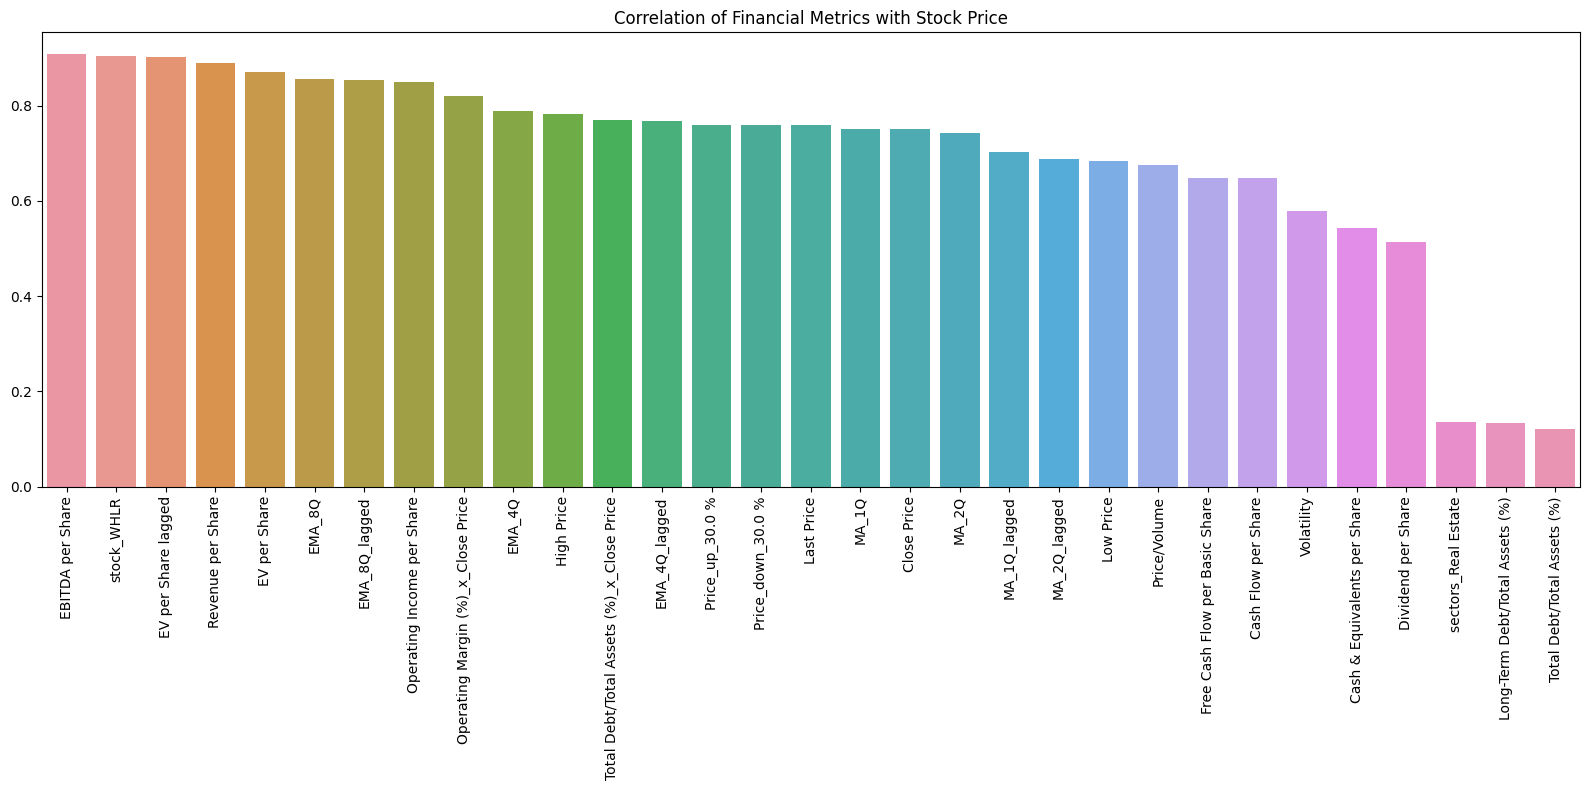

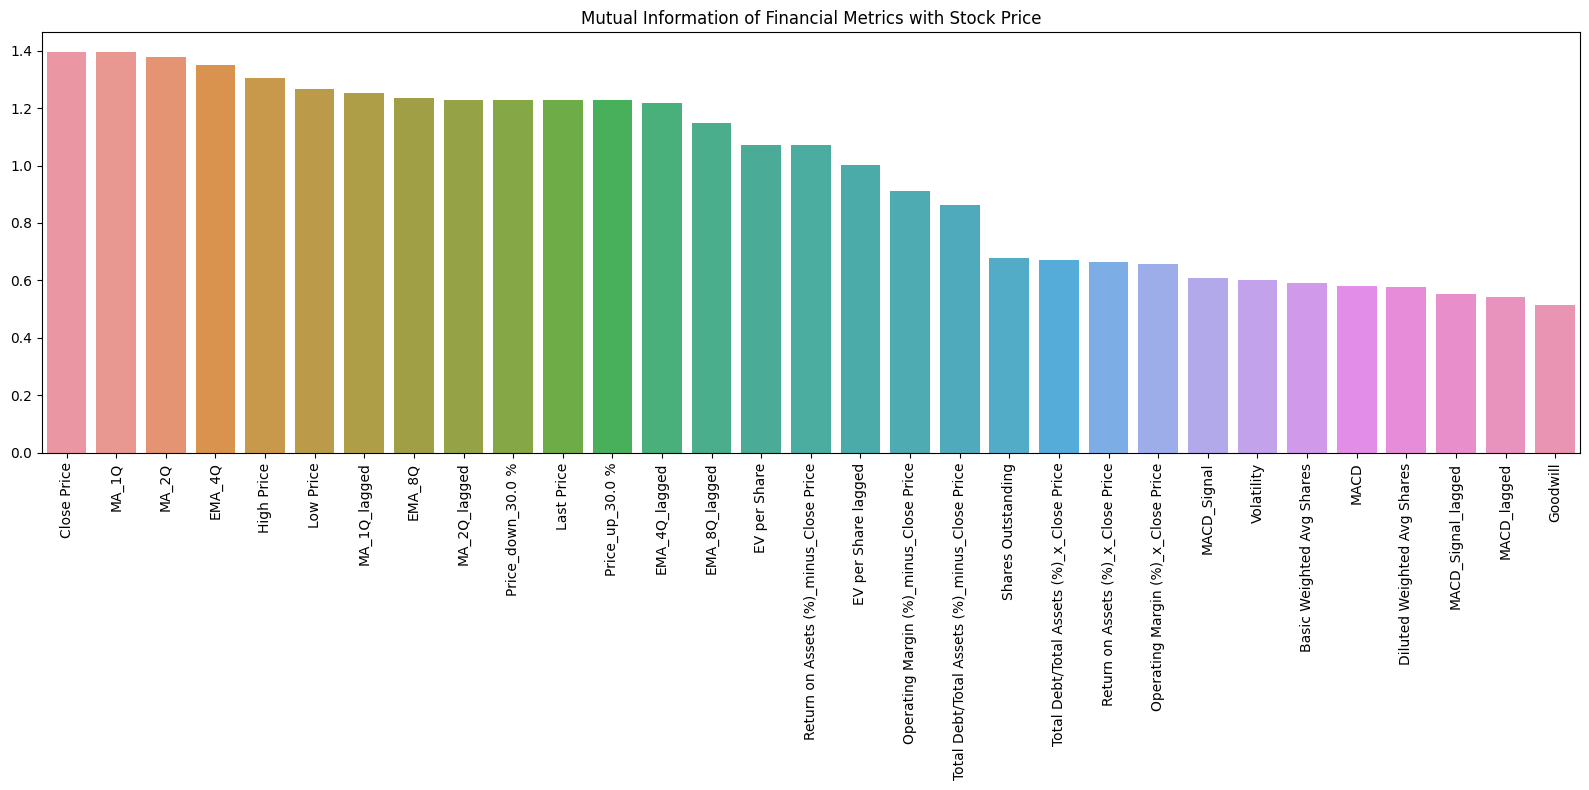

Top 20 Correlations:
EBITDA per Share                             0.908496
stock_WHLR                                   0.904804
EV per Share lagged                          0.902254
Revenue per Share                            0.890013
EV per Share                                 0.871163
EMA_8Q                                       0.855976
EMA_8Q_lagged                                0.854255
Operating Income per Share                   0.848669
Operating Margin (%)_x_Close Price           0.819163
EMA_4Q                                       0.787700
High Price                                   0.782740
Total Debt/Total Assets (%)_x_Close Price    0.769639
EMA_4Q_lagged                                0.768250
Price_up_30.0 %                              0.759507
Price_down_30.0 %                            0.759507
Last Price                                   0.759507
MA_1Q                                        0.749863
Close Price                                  0.749863
MA_2Q  

In [18]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy of the encoded dataframe
merged_data = df_encoded.copy()


# Convert all columns to numeric where possible (non-numeric will become NaN)
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Drop 'Next Year Price' from numeric columns if it's included
numeric_columns = merged_data.columns[merged_data.dtypes != 'object'].drop('Next Year Price', errors='ignore')
numeric_columns
# Feature columns exclude 'Target_1Y'
feature_columns = [col for col in merged_data.columns if col != 'Next Year Price']

# Calculate correlations - corrwith is used to avoid including 'Target_1Y'
correlations = merged_data[feature_columns].corrwith(merged_data['Next Year Price']).sort_values(ascending=False)

# Calculate mutual information, excluding 'Target_1Y'
mi_scores = mutual_info_regression(merged_data[numeric_columns], merged_data['Next Year Price'])
mi_scores = pd.Series(mi_scores, index=numeric_columns, name='MI Score').sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(16, 8))
sns.barplot(x=correlations.index[:31], y=correlations.values[:31])
plt.title('Correlation of Financial Metrics with Stock Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Correlation_to_stock_price.pdf')
plt.show()

# Visualize mutual information
plt.figure(figsize=(16, 8))
sns.barplot(x=mi_scores.index[:31], y=mi_scores.values[:31])
plt.title('Mutual Information of Financial Metrics with Stock Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Mutual_Info_of_Financial_Metrics.pdf')
plt.show()

# Print top correlations and mutual information scores
print("Top 20 Correlations:")
print(correlations.head(51))

print("\nTop 20 Mutual Information Scores:")
print(mi_scores.head(51))

In [19]:
#Choose only the features that has relationship towards the target
ratio_feature = (mi_scores[mi_scores > 0.3].index.tolist()) + ['Date', 'Stock ID','Sector','Next Year Price']

In [20]:
final_df = final_df_1[ratio_feature]
#drop duplicated values
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

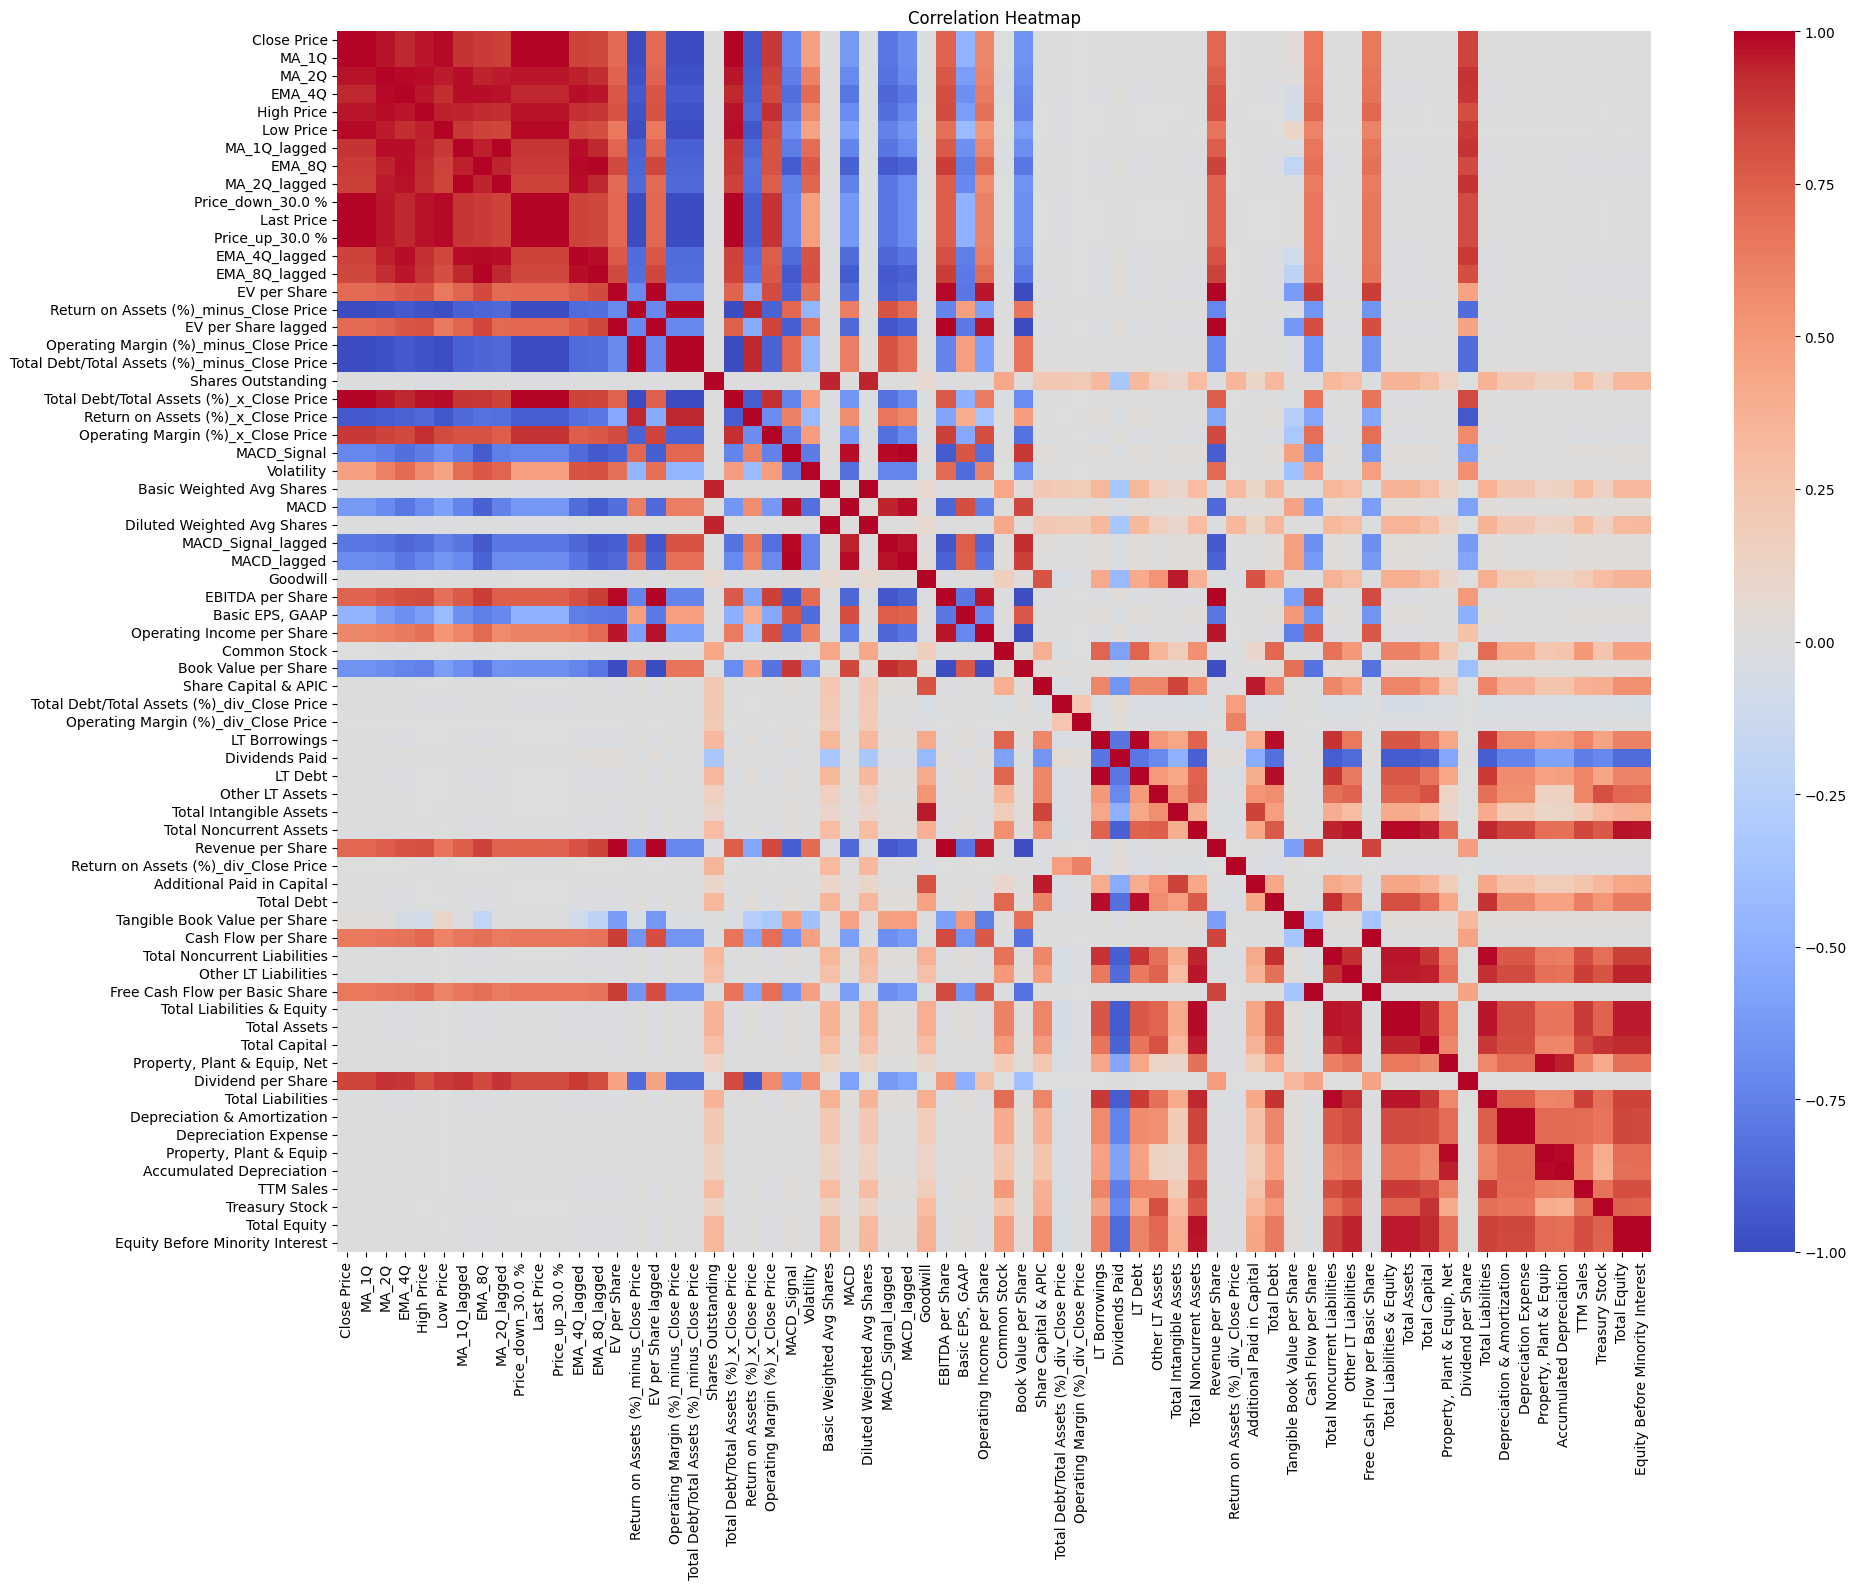

In [21]:
#Correlation Matrix

# Select only numerical columns and drop the target and any non-numeric columns
final_df_num = final_df.drop(['Stock ID', 'Sector', 'Date','Next Year Price'], axis=1)

# Convert all columns to numeric, coercing errors to NaN
final_df_num = final_df_num.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN or infinite values
final_df_num = final_df_num.replace([np.inf, -np.inf], np.nan).dropna()


# Correlation Analysis

# Calculate correlation matrix
correlation_matrix = final_df_num.corr()

# Create a correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('Initial Correlation Heatmap')
plt.show()

In [22]:
# Assuming you have mutual information or importance scores stored in `mi_scores`

# Calculate correlation matrix
corr_matrix = final_df_num.corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize list of columns to drop
to_drop = []

# Iterate over columns to find pairs with high correlation
for column in upper_tri.columns:
    # Get all columns that are highly correlated with the current column
    correlated_features = upper_tri.index[upper_tri[column] > 0.95].tolist()
    if correlated_features:
        # Get scores for the correlated features (including the current column)
        features_to_compare = correlated_features + [column]
        scores = {feature: mi_scores.get(feature, 0) for feature in features_to_compare}
        
        # Keep the feature with the highest score
        keep_feature = max(scores, key=scores.get)
        
        # Mark other features for dropping
        for feature in features_to_compare:
            if feature != keep_feature:
                to_drop.append(feature)

# Drop duplicate features
to_drop = list(set(to_drop))
reduced_df = final_df.drop(columns=to_drop)

print(f"Removed columns: {to_drop}")


Removed columns: ['EMA_8Q', 'Price_down_30.0 %', 'EMA_4Q', 'EMA_4Q_lagged', 'MACD_lagged', 'EV per Share lagged', 'Total Debt/Total Assets (%)_x_Close Price', 'Total Capital', 'Operating Income per Share', 'Equity Before Minority Interest', 'High Price', 'EBITDA per Share', 'EMA_8Q_lagged', 'LT Debt', 'Return on Assets (%)_minus_Close Price', 'MA_1Q_lagged', 'Total Noncurrent Liabilities', 'Return on Assets (%)_x_Close Price', 'Property, Plant & Equip', 'Total Intangible Assets', 'Total Debt/Total Assets (%)_minus_Close Price', 'Total Equity', 'MACD', 'Last Price', 'MA_2Q', 'Total Liabilities & Equity', 'Additional Paid in Capital', 'Free Cash Flow per Basic Share', 'Price_up_30.0 %', 'Diluted Weighted Avg Shares', 'MA_2Q_lagged', 'Depreciation Expense', 'Accumulated Depreciation', 'Revenue per Share', 'MA_1Q', 'MACD_Signal_lagged', 'Book Value per Share', 'Total Assets', 'Low Price', 'Other LT Liabilities', 'Total Debt', 'Total Liabilities', 'Operating Margin (%)_minus_Close Price']


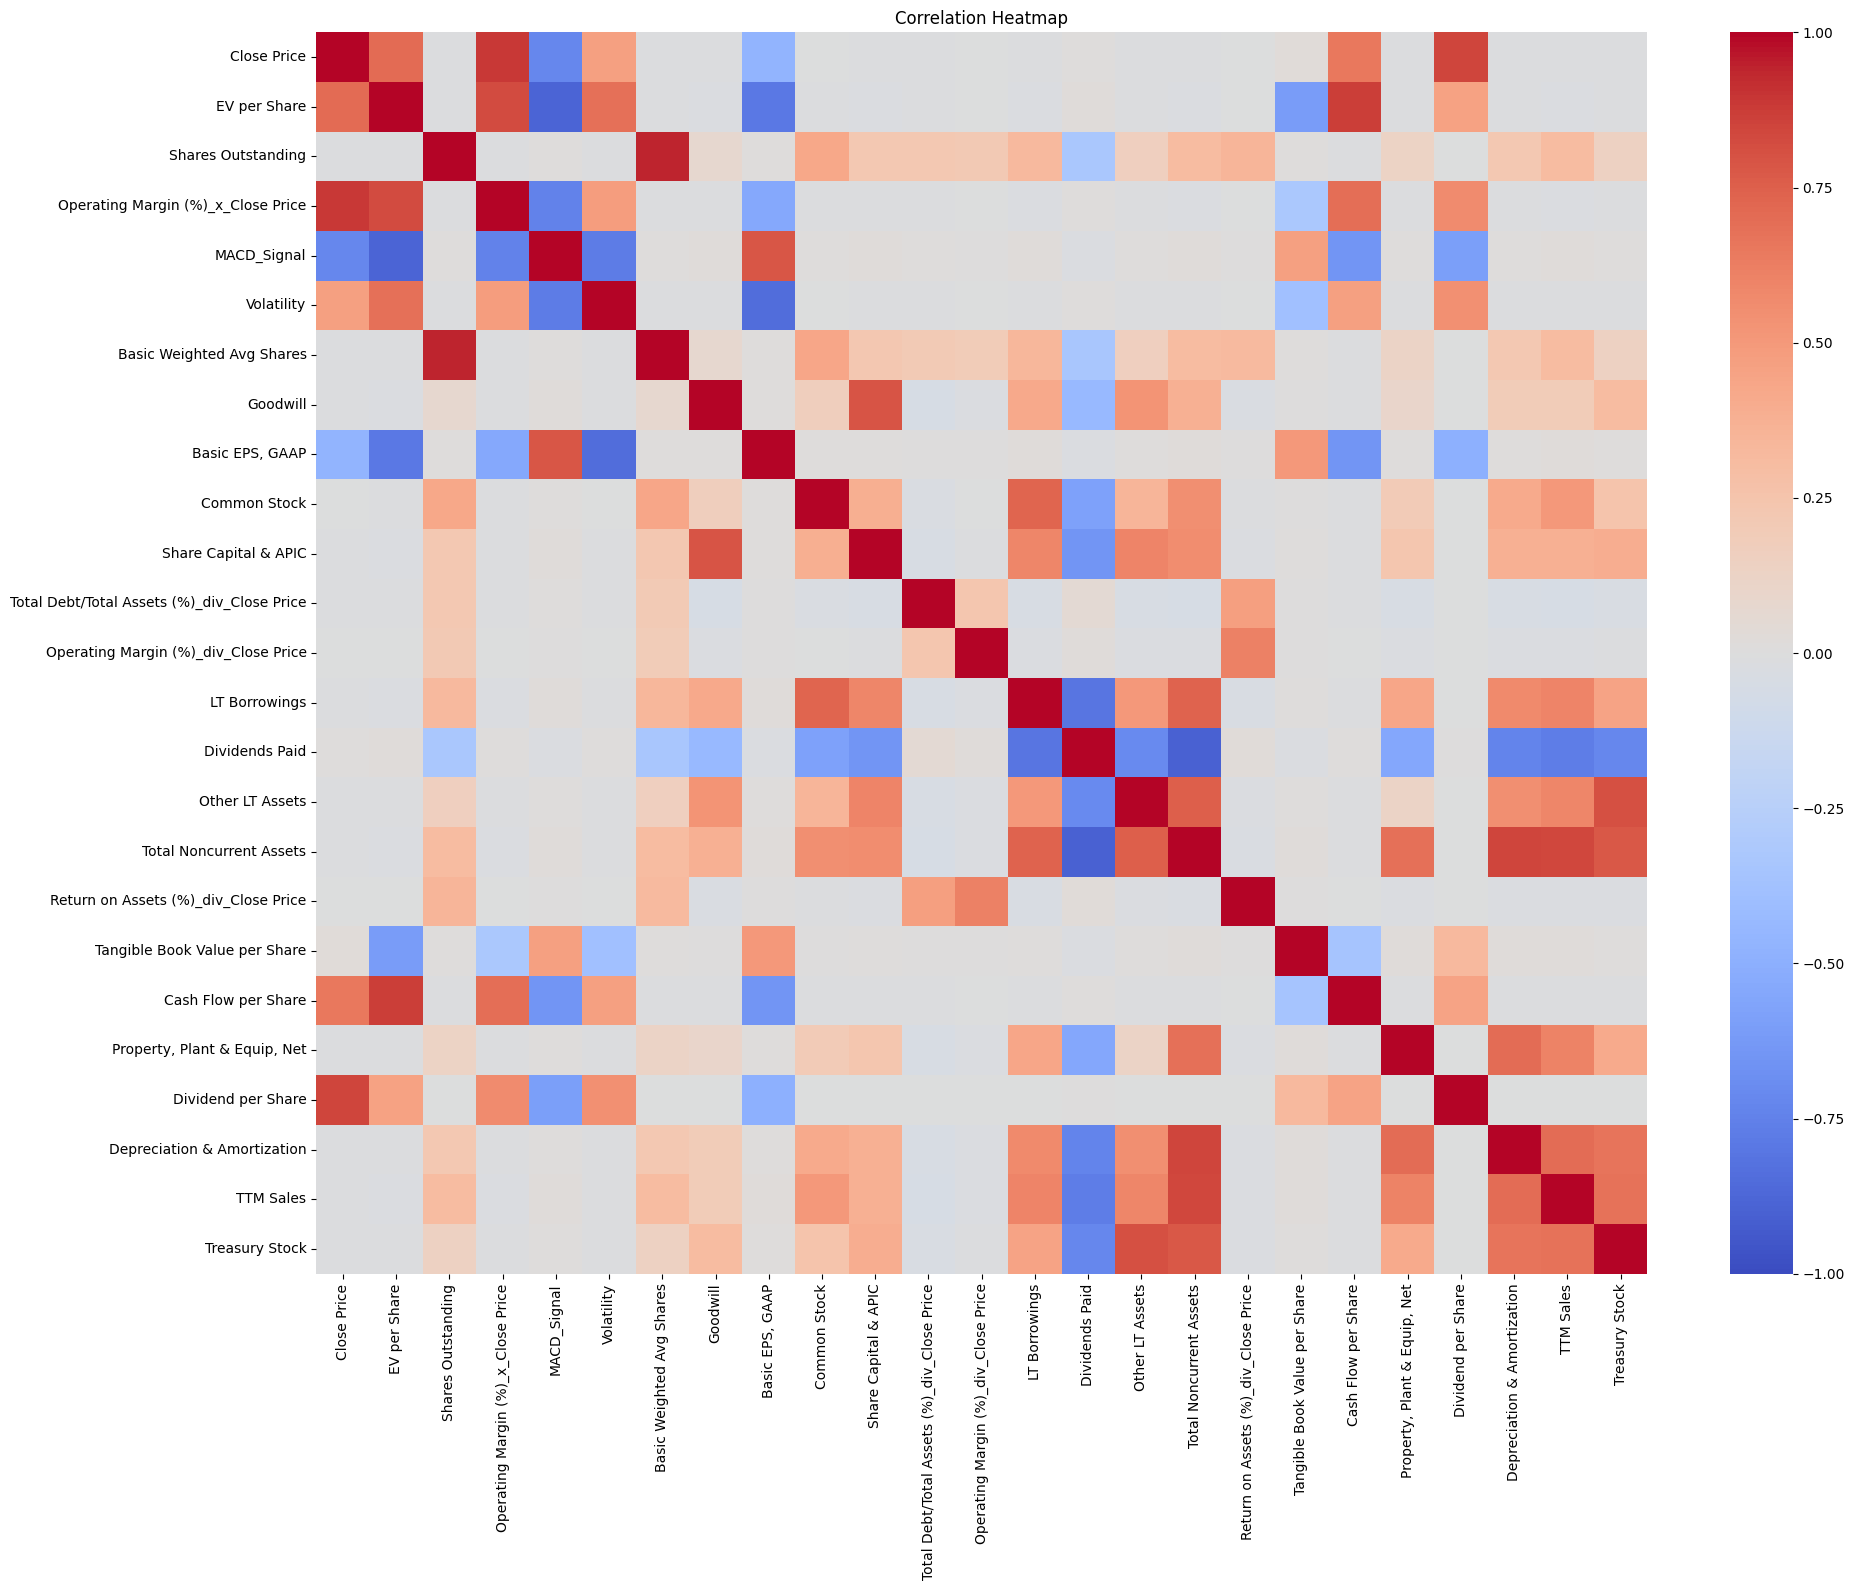

In [23]:
#get updated charts

# Select only numerical columns and drop the target and any non-numeric columns
final_df_num = reduced_df.drop(['Stock ID', 'Sector', 'Date','Next Year Price'], axis=1)

# Convert all columns to numeric, coercing errors to NaN
final_df_num = final_df_num.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN or infinite values
final_df_num = final_df_num.replace([np.inf, -np.inf], np.nan).dropna()

# Correlation Analysis

# Calculate correlation matrix
correlation_matrix = final_df_num.corr()

# Create a correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('Updated Correlation Heatmap.pdf')
plt.show()

In [24]:
## top 3 stats

# reduced_df[['Next Year Price','EV per Share','MA_1Q']]

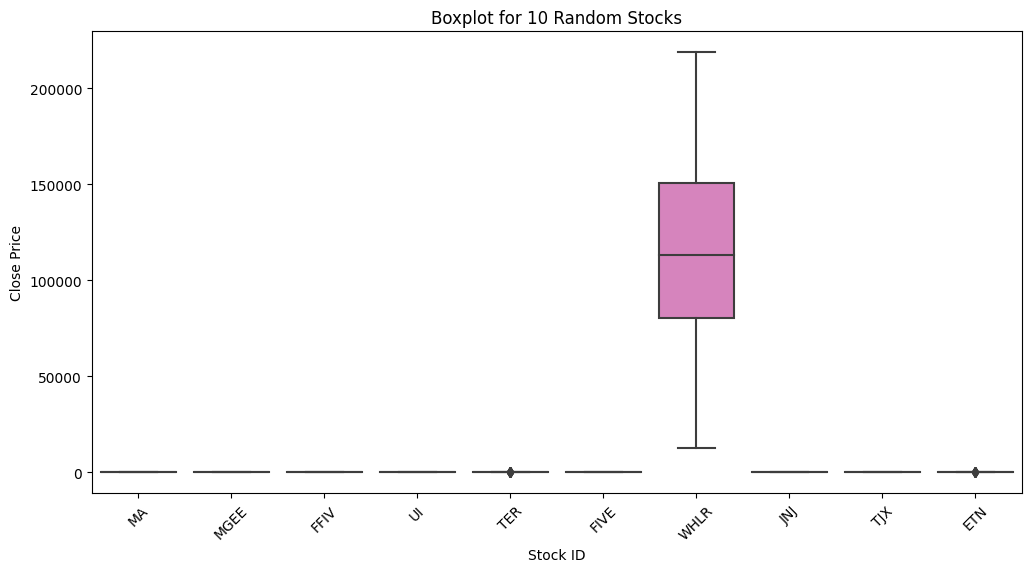

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

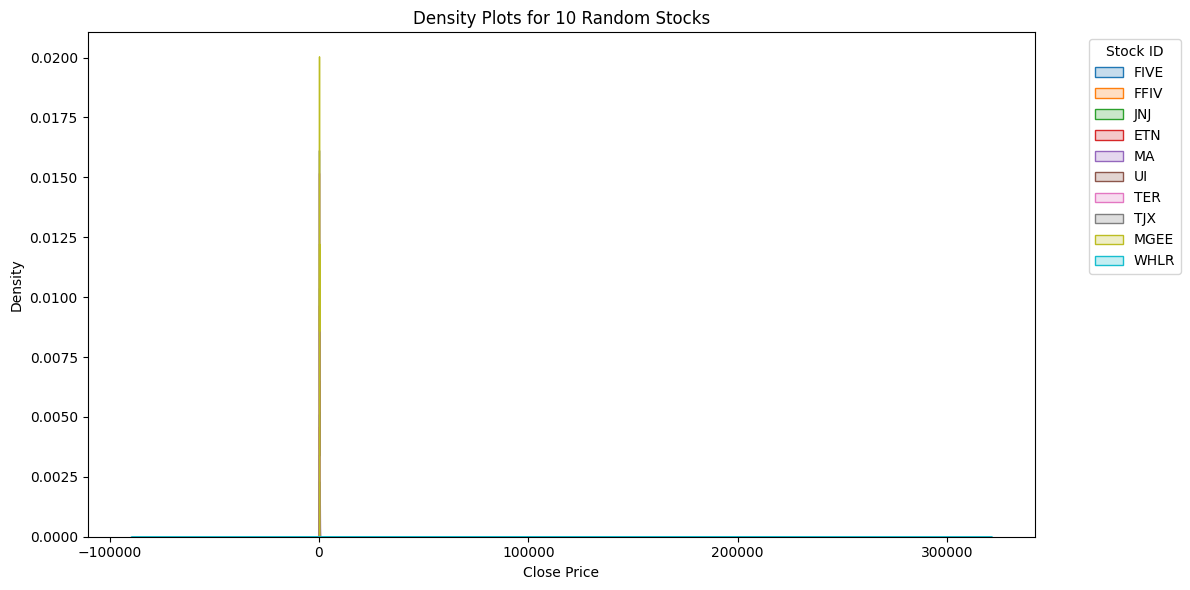

In [25]:
#Outliers Analysis

np.random.seed(42)
# Step 1: Select 10 random stocks
random_stocks = np.random.choice(reduced_df['Stock ID'].unique(), size=10, replace=False)
selected_data = reduced_df[reduced_df['Stock ID'].isin(random_stocks)]

# Step 2: Plot Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stock ID', y='Next Year Price', data=selected_data)
plt.title('Boxplot for 10 Random Stocks')
plt.xticks(rotation=45)
plt.xlabel('Stock ID')
plt.ylabel('Close Price')
plt.show()

# Step 3: Plot Density Plot 
plt.figure(figsize=(12, 6))
for stock in random_stocks:
    stock_data = selected_data[selected_data['Stock ID'] == stock]['Next Year Price']
    sns.kdeplot(stock_data, fill=True, label=stock)

plt.title('Density Plots for 10 Random Stocks')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend(title='Stock ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
#It seems there's one problematic stock with unrational values : WHLR

WHLR = reduced_df[reduced_df['Stock ID'] == 'WHLR']

WHLR.describe()

#Drop this 

,Close Price,EV per Share,Shares Outstanding,Operating Margin (%)_x_Close Price,MACD_Signal,Volatility,Basic Weighted Avg Shares,Goodwill,"Basic EPS, GAAP",Common Stock,...,Total Noncurrent Assets,Return on Assets (%)_div_Close Price,Tangible Book Value per Share,Cash Flow per Share,"Property, Plant & Equip, Net",Dividend per Share,Depreciation & Amortization,TTM Sales,Treasury Stock,Next Year Price
count,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,...,1.200000e+01,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,1.200000e+01,1.200000e+01,12.0,12.000000
mean,173451.599935,193075.497582,2642.583333,3.957044e+06,-125433.732389,72547.111335,2640.083333,9.143333e+05,-1843.859797,95166.666667,...,4.529845e+08,-1.952604e-05,-9025.618794,2155.403489,7.523992e+07,438.429181,4.651750e+06,6.047456e+07,0.0,114940.799967
std,173174.771373,21439.288736,116.597566,2.607955e+06,55938.264100,77291.592794,120.359657,2.135423e+06,1494.311822,4108.380201,...,5.737432e+07,2.736040e-05,11814.515940,1564.735101,1.449968e+08,856.606536,1.070430e+06,4.723997e+06,0.0,56342.380510
min,38491.199219,179926.132053,2385.000000,7.994344e+05,-182697.836685,14294.674813,2376.000000,0.000000e+00,-5981.017464,86000.000000,...,4.162080e+08,-8.877395e-05,-16354.970326,669.016698,2.488000e+06,0.000000,3.656000e+06,4.934483e+07,0.0,12873.599609
25%,67176.000000,183551.656833,2679.500000,1.672071e+06,-174087.640880,32820.005444,2677.500000,0.000000e+00,-2125.739462,96500.000000,...,4.233965e+08,-2.774323e-05,-15085.090288,1285.075877,1.372000e+07,0.000000,3.785750e+06,6.039775e+07,0.0,80568.000000
50%,123336.000000,187422.129298,2693.500000,4.190282e+06,-146738.102810,42478.025821,2693.500000,0.000000e+00,-1561.859932,97000.000000,...,4.411285e+08,-4.885529e-06,-14814.997665,1768.872115,1.433400e+07,0.000000,4.410000e+06,6.139950e+07,0.0,113400.000000
75%,176148.000000,191282.067796,2696.250000,5.245820e+06,-80682.056709,77041.455884,2695.250000,0.000000e+00,-1216.944222,97000.000000,...,4.514972e+08,-3.492381e-06,-10442.702750,2487.924906,1.516225e+07,288.249810,4.863750e+06,6.284625e+07,0.0,150660.000000
max,597888.000000,259785.147059,2720.000000,8.633252e+06,-30429.645064,265698.392811,2720.000000,5.486000e+06,306.893996,98000.000000,...,6.268080e+08,4.205211e-07,16891.835017,6618.750000,3.867040e+08,2606.481481,6.593000e+06,6.537400e+07,0.0,218592.000000


In [27]:
cleaned_df = reduced_df[reduced_df['Stock ID'] != 'WHLR']

In [28]:
# Define a threshold for identifying outliers (e.g., 99th percentile)
threshold = cleaned_df['Next Year Price'].quantile(0.99)

cleaned_df_no_outliers = cleaned_df[cleaned_df['Next Year Price'] <= threshold]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


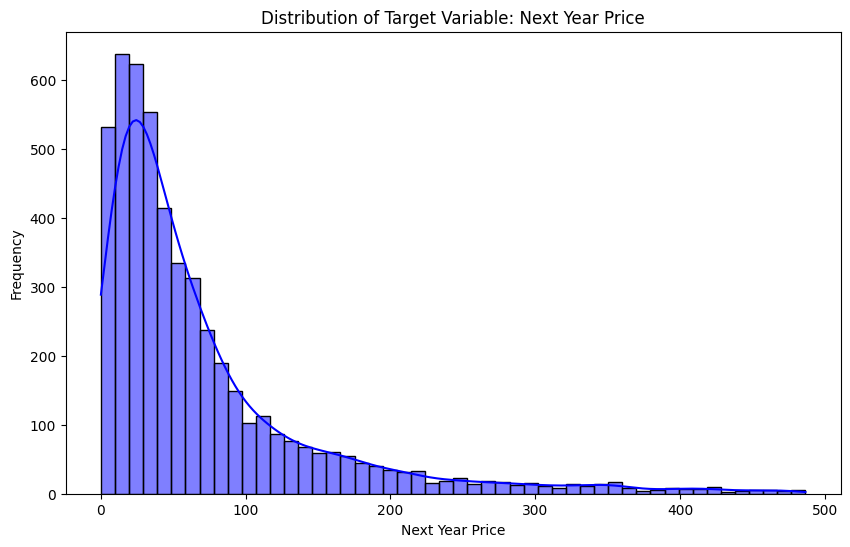

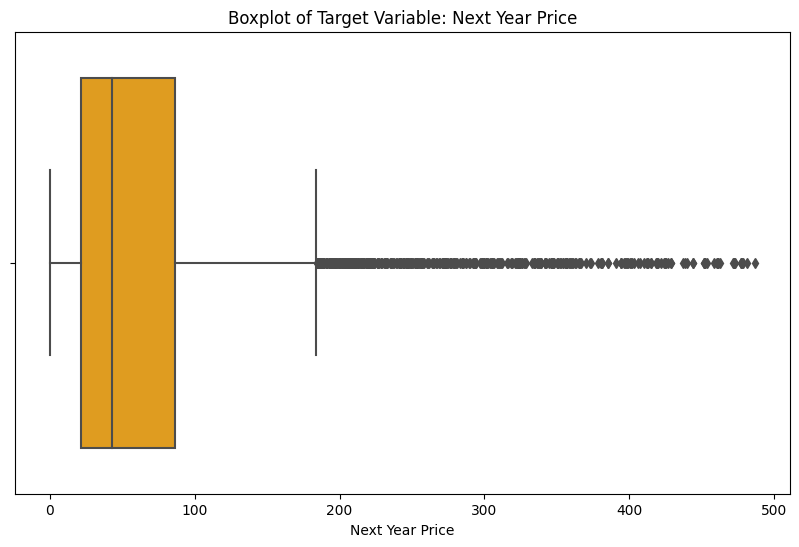

In [29]:
#Check the distribution of the data
# ascii
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram and KDE for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df_no_outliers['Next Year Price'], kde=True, bins=50, color='blue')
plt.title("Distribution of Target Variable: Next Year Price")
plt.xlabel("Next Year Price")
plt.ylabel("Frequency")
plt.savefig('Target Price Distribution.pdf')
plt.show()

# Boxplot to highlight outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df_no_outliers, x='Next Year Price', color='orange')
plt.title("Boxplot of Target Variable: Next Year Price")
plt.xlabel("Next Year Price")
plt.show()


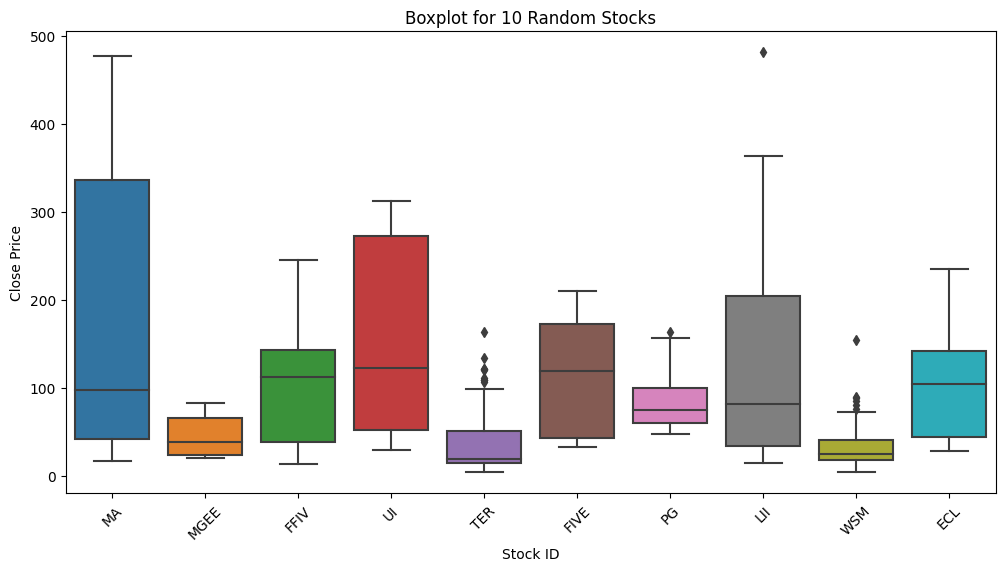

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

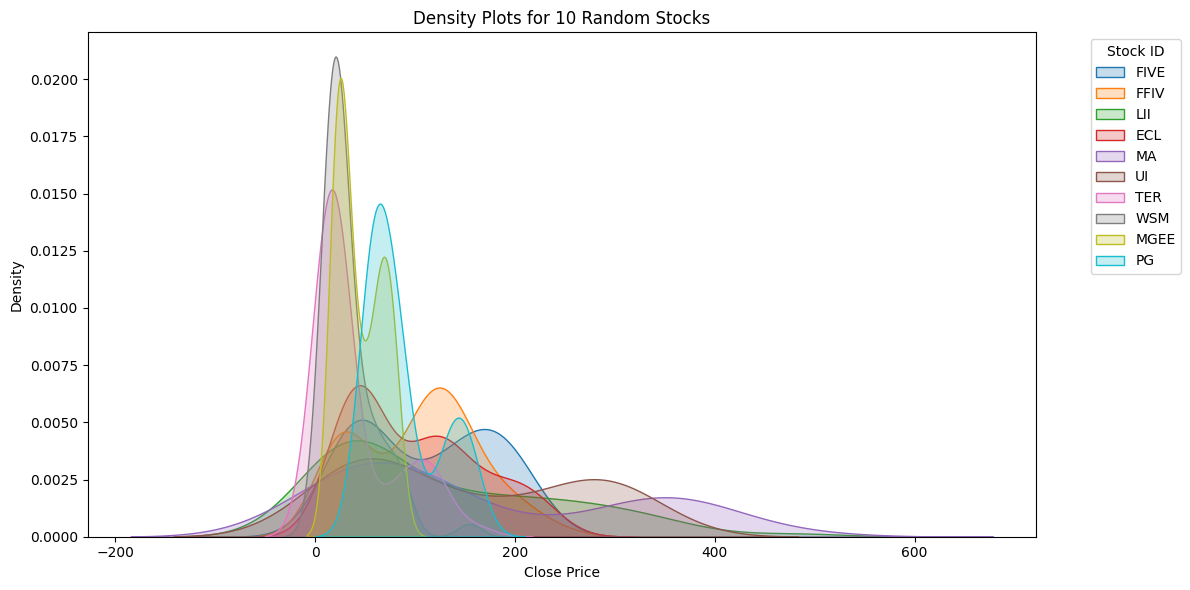

In [30]:
#check for outliers again

np.random.seed(42)
# Step 1: Select 10 random stocks
random_stocks = np.random.choice(cleaned_df_no_outliers['Stock ID'].unique(), size=10, replace=False)
selected_data = cleaned_df_no_outliers[cleaned_df_no_outliers['Stock ID'].isin(random_stocks)]

# Step 2: Plot Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stock ID', y='Next Year Price', data=selected_data)
plt.title('Boxplot for 10 Random Stocks')
plt.xticks(rotation=45)
plt.xlabel('Stock ID')
plt.ylabel('Close Price')
plt.show()

# Step 3: Plot Density Plot 
plt.figure(figsize=(12, 6))
for stock in random_stocks:
    stock_data = selected_data[selected_data['Stock ID'] == stock]['Next Year Price']
    sns.kdeplot(stock_data, fill=True, label=stock)

plt.title('Density Plots for 10 Random Stocks')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend(title='Stock ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
#Describe 10 features

cleaned_df_no_outliers.describe()

,Close Price,EV per Share,Shares Outstanding,Operating Margin (%)_x_Close Price,MACD_Signal,Volatility,Basic Weighted Avg Shares,Goodwill,"Basic EPS, GAAP",Common Stock,...,Total Noncurrent Assets,Return on Assets (%)_div_Close Price,Tangible Book Value per Share,Cash Flow per Share,"Property, Plant & Equip, Net",Dividend per Share,Depreciation & Amortization,TTM Sales,Treasury Stock,Next Year Price
count,5072.000000,5072.000000,5.072000e+03,5072.000000,5072.000000,5072.000000,5.072000e+03,5.072000e+03,5072.000000,5.072000e+03,...,5.072000e+03,5072.000000,5072.000000,5072.000000,5.072000e+03,5072.000000,5.072000e+03,5.072000e+03,5.072000e+03,5072.000000
mean,63.271182,58.215037,1.037964e+09,1168.622902,2.081446,8.083367,9.434654e+08,2.378844e+09,0.630175,8.446057e+08,...,1.527231e+10,0.466264,6.397468,0.979656,6.091950e+09,0.249628,2.432926e+08,1.938975e+10,6.005195e+09,70.698922
std,73.627080,77.081198,3.408204e+09,2228.080893,67.958567,10.982588,3.278144e+09,6.513500e+09,1.322771,3.797514e+09,...,3.792964e+10,4.511435,14.238233,1.467366,1.962740e+10,0.533819,7.771852e+08,4.938158e+10,2.253771e+10,79.579929
min,0.107333,0.000000,0.000000e+00,-22344.163424,-3842.943859,0.022954,0.000000e+00,0.000000e+00,-24.305732,0.000000e+00,...,0.000000e+00,-42.376257,-68.696070,-6.716700,-2.532000e+08,-0.014097,-3.860000e+08,4.031000e+06,-6.898410e+08,0.121000
25%,18.160000,9.884521,7.440608e+07,155.088653,0.177512,1.910610,3.820375e+07,0.000000e+00,0.052261,4.857500e+05,...,5.476578e+08,0.070123,0.000000,0.098633,5.791425e+07,0.000000,1.039975e+07,8.833135e+08,0.000000e+00,21.143988
50%,38.570000,30.628792,2.366931e+08,538.269039,1.597664,4.252489,1.852345e+08,1.219285e+08,0.372681,4.000000e+06,...,2.532971e+09,0.156523,2.858227,0.569103,6.186500e+08,0.110380,4.069550e+07,3.685188e+09,3.747500e+07,43.013000
75%,77.600002,75.505662,5.111157e+08,1442.419269,5.002641,9.654978,4.756250e+08,1.826275e+09,0.920000,3.199702e+08,...,1.249215e+10,0.381719,9.986465,1.386854,3.491819e+09,0.361360,1.616470e+08,1.444550e+10,2.221841e+09,86.289999
max,658.460022,668.911229,2.629782e+10,32967.599188,86.896841,159.659373,2.627360e+10,5.976700e+10,24.258258,6.639900e+10,...,3.125450e+11,160.038337,82.313481,24.682757,2.530180e+11,25.654589,3.029100e+10,5.064810e+11,2.446760e+11,486.519989


### Data Splitting

In [32]:
final_df = cleaned_df_no_outliers.copy()

In [33]:
unique_stocks = final_df["Stock ID"].unique()

np.random.seed(99)

n_train = int(0.6 * len(unique_stocks))
n_val = int(0.2 * len(unique_stocks))

train_stocks = np.random.choice(unique_stocks, size = n_train, replace = False)
remaining_stocks = np.setdiff1d(unique_stocks,train_stocks)


val_stocks = np.random.choice(remaining_stocks, size=n_val, replace=False)
test_stocks = np.setdiff1d(remaining_stocks, val_stocks)

# Split data by stock
train = final_df[final_df["Stock ID"].isin(train_stocks)]
val = final_df[final_df["Stock ID"].isin(val_stocks)]
test = final_df[final_df["Stock ID"].isin(test_stocks)]

In [34]:
train_stocks

array(['ORLY', 'TRNO', 'JNJ', 'EQR', 'WY', 'MSI', 'ADSK', 'SPGI', 'ODFL',
       'HD', 'NVDA', 'AVY', 'MAYS', 'DVN', 'NEU', 'ETN', 'IT', 'AWR',
       'RMD', 'CDNS', 'ECL', 'MRVL', 'LANC', 'MRK', 'GNTX', 'MGEE', 'RYN',
       'VLO', 'HAL', 'PKG', 'MSCI', 'PNRG', 'UNP', 'IPAR', 'MA', 'CTAS',
       'ELS', 'ARCH', 'ABT', 'ZTS', 'EXTR', 'PPG', 'DHI', 'AAPL', 'DGII',
       'DD', 'FIZZ', 'ROL', 'PG', 'FND', 'WSM', 'RS', 'MTD', 'WDFC',
       'XOM'], dtype=object)

In [35]:
#list of features that's going to be used

features = final_df.drop(['Next Year Price','Date', 'Stock ID','Sector'],axis = 1).columns

len(features)

25

In [36]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables respectively
target = 'Next Year Price'

X_train = train[features]
y_train_next_year = train[target]
X_val = val[features]
y_val_next_year = val[target]
X_test = test[features]
y_test_next_year = test[target]

#Check the distribution
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3029, 25)
(1036, 25)
(1007, 25)


In [37]:
#Scale the features for SVM

from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [38]:
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_final = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Check the final combined DataFrames
print(X_train_final.head())

   Close Price  EV per Share  Shares Outstanding  \
0    -0.490036     -0.454853           -0.026713   
1    -0.612429     -0.566590           -0.026713   
2    -0.660170     -0.755079           -0.026713   
3    -0.626099     -0.573240           -0.026713   
4    -0.626335     -0.577124           -0.009881   

   Operating Margin (%)_x_Close Price  MACD_Signal  Volatility  \
0                           -1.541247     0.033351    0.182742   
1                           -0.640645     0.033802   -0.400157   
2                            0.878551     0.026451   -0.231357   
3                           -0.168619     0.019683   -0.231294   
4                           -0.202424     0.013926   -0.610186   

   Basic Weighted Avg Shares  Goodwill  Basic EPS, GAAP  Common Stock  ...  \
0                   0.004151 -0.323095        -0.898900     -0.260634  ...   
1                   0.002859 -0.325741        -0.596199     -0.260634  ...   
2                  -0.309007 -0.318109        -0.489656 

### Recursive Feature Elimination

In [39]:
#Create a dictionary to see which number of features are the best
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
num_features = len(features)

pipeline_result = {}
rand_num = 52 #set random number fo reproducability
for n in range(1,num_features + 1):
    model = RandomForestRegressor(random_state = rand_num + (n*2)) 
    rfe = RFE(estimator=model,step = 1, n_features_to_select = num_features)
    pipeline = Pipeline([
        ('feature_selection', rfe),
        ('model', model)
    ])

# Fit RFE and model on training data
    pipeline.fit(X_train_final, y_train_next_year)

# Use validation data for evaluation
    val_score = pipeline.score(X_val_final, y_val_next_year)

    pipeline_result[n] = [round(val_score,3)]

In [40]:
pipeline_result

{1: [0.892],
 2: [0.894],
 3: [0.895],
 4: [0.893],
 5: [0.889],
 6: [0.892],
 7: [0.894],
 8: [0.894],
 9: [0.893],
 10: [0.891],
 11: [0.894],
 12: [0.893],
 13: [0.894],
 14: [0.892],
 15: [0.893],
 16: [0.893],
 17: [0.893],
 18: [0.893],
 19: [0.893],
 20: [0.894],
 21: [0.895],
 22: [0.895],
 23: [0.894],
 24: [0.894],
 25: [0.894]}

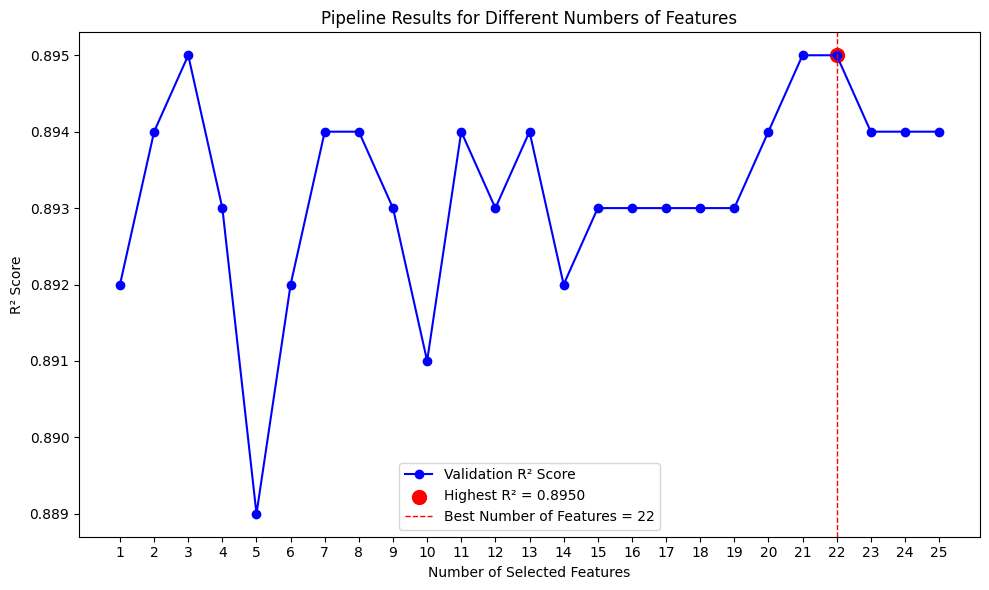

Highest R² Score: 0.8950
Number of Features Selected: 22


In [41]:
keys = list(pipeline_result.keys())  # Number of features
values = np.array(list(pipeline_result.values()))  # Validation R² scores

# Extracting R² scores
r2_scores = values[:, 0]
max_r2_value = max(r2_scores)  # Find the highest R² value

# Find all indices with the maximum R² value
max_r2_indices = [i for i, score in enumerate(r2_scores) if score == max_r2_value]

# Select the index corresponding to the largest number of features
max_r2_idx = max(max_r2_indices, key=lambda idx: keys[idx])
max_r2_features = keys[max_r2_idx]

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot R² scores as a line chart
ax.plot(keys, r2_scores, marker='o', linestyle='-', color='blue', label='Validation R² Score')
ax.scatter([max_r2_features], [max_r2_value], color='red', s=100, label=f'Highest R² = {max_r2_value:.4f}')

# Customize the chart
ax.set_xticks(keys)
ax.set_xlabel("Number of Selected Features")
ax.set_ylabel("R² Score")
ax.set_title("Pipeline Results for Different Numbers of Features")
ax.axvline(x=max_r2_features, color='red', linestyle='--', linewidth=1, label=f'Best Number of Features = {max_r2_features}')
ax.legend()

# Save and display the plot
plt.tight_layout()
plt.savefig('RFE_Result_Line_Chart.pdf')
plt.show()

# Print the result
print(f"Highest R² Score: {max_r2_value:.4f}")
print(f"Number of Features Selected: {max_r2_features}")


In [42]:
# Select feature based on the best result
model = RandomForestRegressor(random_state = 42) 

rfe = RFE(estimator=model, n_features_to_select=22)
pipeline = Pipeline([
    ('feature_selection', rfe),
    ('model', model)
])

# Fit RFE and model on training data
pipeline.fit(X_train_final, y_train_next_year)

# Use validation data for evaluation
val_score = pipeline.score(X_val_final, y_val_next_year)

selected_features = X_train_final.columns[rfe.support_]
selected_features


Index(['Close Price', 'EV per Share', 'Shares Outstanding',
       'Operating Margin (%)_x_Close Price', 'MACD_Signal', 'Volatility',
       'Basic Weighted Avg Shares', 'Goodwill', 'Basic EPS, GAAP',
       'Common Stock', 'Share Capital & APIC',
       'Total Debt/Total Assets (%)_div_Close Price',
       'Operating Margin (%)_div_Close Price', 'Dividends Paid',
       'Other LT Assets', 'Return on Assets (%)_div_Close Price',
       'Tangible Book Value per Share', 'Cash Flow per Share',
       'Property, Plant & Equip, Net', 'Dividend per Share',
       'Depreciation & Amortization', 'Treasury Stock'],
      dtype='object')

In [43]:
#Use selected features based on RFE result

X_train_final = X_train_final[selected_features]
X_val_final = X_val_final[selected_features]
X_test_final = X_test_final[selected_features]

In [44]:
#Create Dictionary to compare all baseline results on test data

val_rmse = {}
val_r2 = {}
val_mape = {}
val_mae = {}
test_rmse = {}
test_r2 = {}
test_mape = {}
test_mae = {}

Root Mean Squared Error: 49.88
R-squared Score: 0.621
Mean Aboslute Percentage Error: 76.71%
Mean Aboslute Error: 22.75


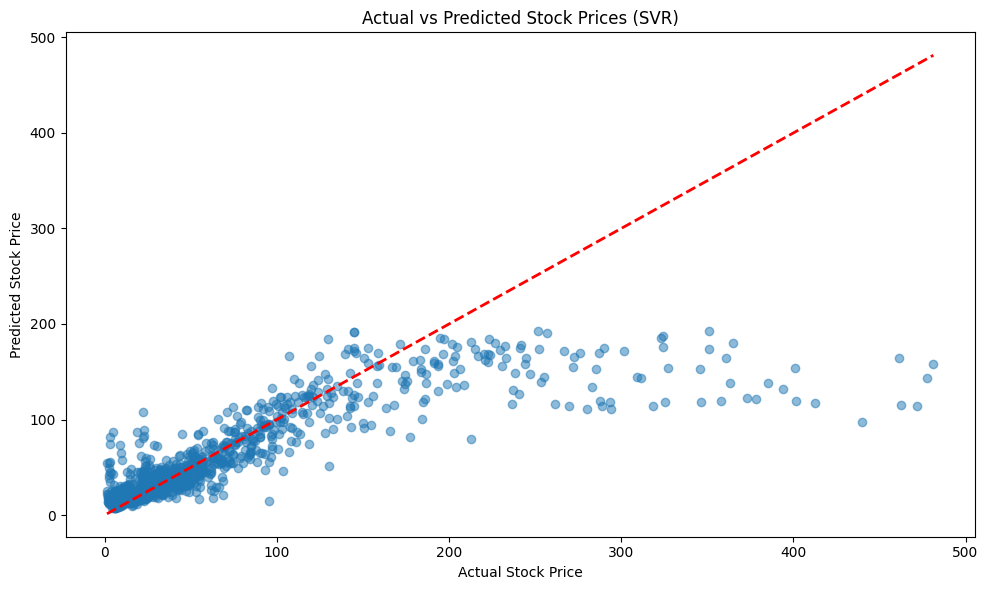

In [45]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_absolute_error


# Create and train the SVM model
svm_model = SVR()
svm_model.fit(X_train_final, y_train_next_year)  # Make sure X_train_final and y_train_val are aligned in shape

# Make predictions on validation set
svr_val_pred = svm_model.predict(X_val_final)

# Evaluate the model
mse = mean_squared_error(y_val_next_year, svr_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_next_year, svr_val_pred)
mape = mean_absolute_percentage_error(y_val_next_year, svr_val_pred)*100
mae = mean_absolute_error(y_val_next_year, svr_val_pred)

val_rmse['SVR'] = rmse
val_r2['SVR'] = r2
val_mape['SVR'] = mape
val_mae['SVR'] = mae
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_next_year, svr_val_pred, alpha=0.5)
plt.plot([y_val_next_year.min(), y_val_next_year.max()], [y_val_next_year.min(), y_val_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (SVR)")
plt.tight_layout()
plt.savefig('SVR Base - Validation Result.pdf')
plt.show()

Root Mean Squared Error: 26.23
R-squared Score: 0.895
Mean Aboslute Percentage Error: 36.28%
Mean Aboslute Error: 15.08


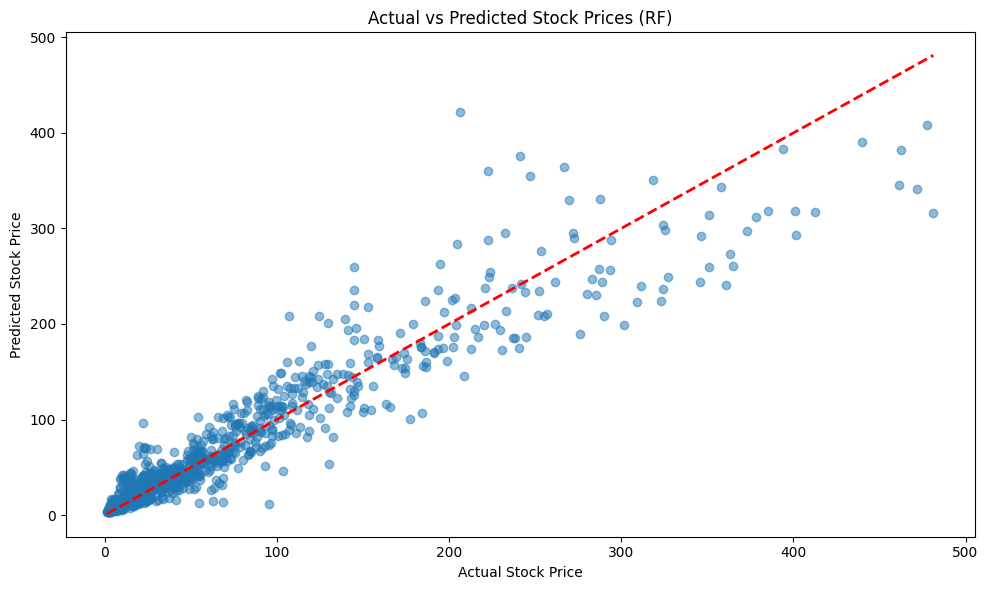

In [46]:
# Try all the machine learning model that I will use
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train_final, y_train_next_year)

# Make predictions
rf_pred = rf_model.predict(X_val_final)

# Evaluate the model
mse = mean_squared_error(y_val_next_year, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_next_year, rf_pred)
mape = mean_absolute_percentage_error(y_val_next_year, rf_pred)*100
mae = mean_absolute_error(y_val_next_year, rf_pred)

val_rmse['RF'] = rmse
val_r2['RF'] = r2
val_mape['RF'] = mape
val_mae['RF'] = mae

print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_next_year, rf_pred, alpha=0.5)
plt.plot([y_val_next_year.min(), y_val_next_year.max()], [y_val_next_year.min(), y_val_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (RF)")
plt.tight_layout()
plt.savefig('RF Base - Validation Result.pdf')
plt.show()

Root Mean Squared Error: 25.85
R-squared Score: 0.898
Mean Aboslute Percentage Error: 45.98%
Mean Aboslute Error: 14.78


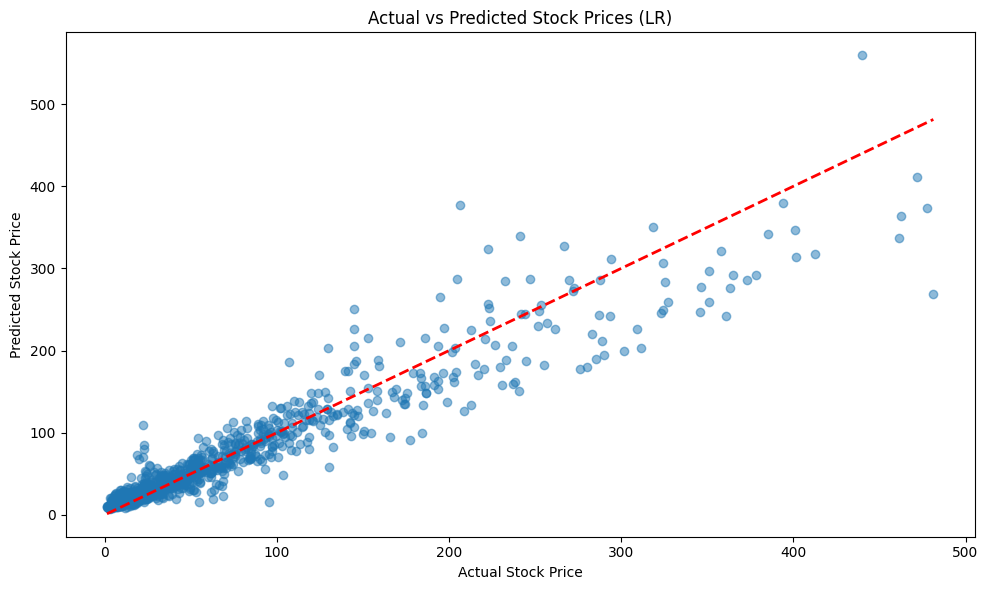

In [47]:
# Try all the machine learning model that I will use
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train_next_year)

# Make predictions
lr_quarter_pred = lr_model.predict(X_val_final)

# Evaluate the model
mse = mean_squared_error(y_val_next_year, lr_quarter_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_next_year, lr_quarter_pred)
mape = mean_absolute_percentage_error(y_val_next_year, lr_quarter_pred)*100
mae = mean_absolute_error(y_val_next_year, lr_quarter_pred)
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")

val_rmse['LR'] = rmse
val_r2['LR'] = r2
val_mape['LR'] = mape
val_mae['LR'] = mae


# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val_next_year, lr_quarter_pred, alpha=0.5)
plt.plot([y_val_next_year.min(), y_val_next_year.max()], [y_val_next_year.min(), y_val_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (LR)")
plt.tight_layout()
plt.savefig('LR Base - Validation Result.pdf')
plt.show()

Root Mean Squared Error: 30.34
R-squared Score: 0.86
Mean Aboslute Percentage Error: 38.89%
Mean Aboslute Error: 16.3


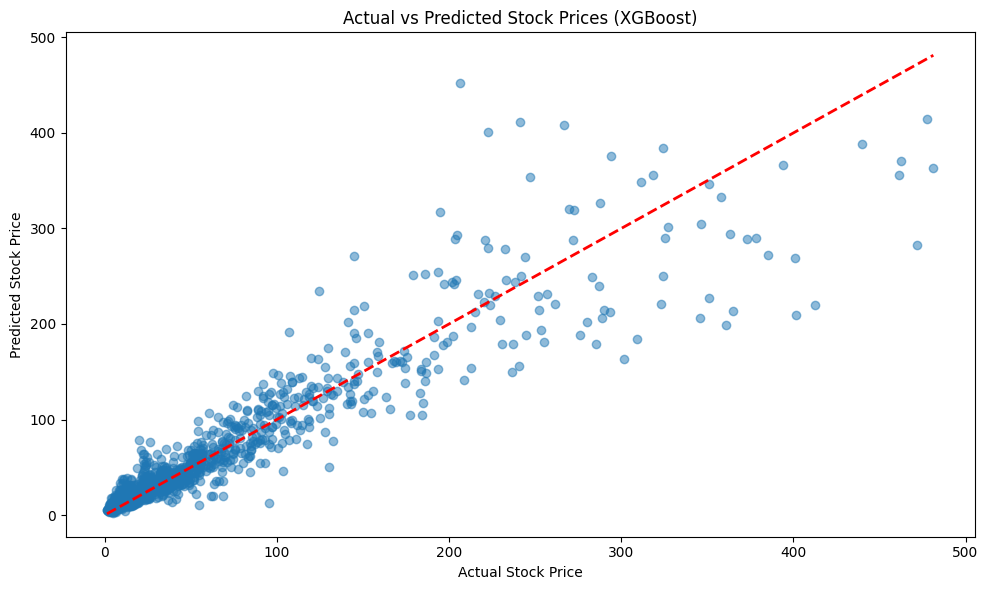

In [48]:
from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_final, y_train_next_year)

# Make predictions
xgb_val_pred = xgb_model.predict(X_val_final)

# Evaluate the model
mse = mean_squared_error(y_val_next_year, xgb_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_next_year, xgb_val_pred)
mae = mean_absolute_error(y_val_next_year, xgb_val_pred)
mape = mean_absolute_percentage_error(y_val_next_year, xgb_val_pred)*100

val_rmse['XGBoost'] = rmse
val_r2['XGBoost'] = r2
val_mape['XGBoost'] = mape
val_mae['XGBoost'] = mae

print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_next_year, xgb_val_pred, alpha=0.5)
plt.plot([y_val_next_year.min(), y_val_next_year.max()], [y_val_next_year.min(), y_val_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (XGBoost)")
plt.tight_layout()
plt.savefig('XGBoost Base - Validation Result.pdf')
plt.show()

### Hyperparameter Tuning

In [49]:
# Define a function to evaluate model performance
def evaluate_model(model, X_val, y_val):
    # Predictions on validation set
    val_pred = model.predict(X_val)
    val_metrics = {
        "RMSE": np.sqrt(mean_squared_error(y_val, val_pred)),
        "R2": r2_score(y_val, val_pred),
        "MAPE": mean_absolute_percentage_error(y_val, val_pred) * 100,
        "MAE": mean_absolute_error(y_val, val_pred)
    }


    return {"Validation": val_metrics}

In [111]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd


# Define baseline models with default parameters
baseline_models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state = 42),
    "XGBoost": XGBRegressor(random_state = 42)
}

# Train and evaluate baseline models
baseline_results = {}
for name, model in baseline_models.items():
    model.fit(X_train_final, y_train_next_year)  # Train on training data only
    baseline_results[name] = evaluate_model(model, X_val_final, y_val_next_year)

# Hyperparameter tuning for Ridge Regression
param_grid_ridge = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 150, 200, 250, 300]}
ridge_search = RandomizedSearchCV(Ridge(), param_grid_ridge, scoring="r2", cv=5, n_jobs=-1, n_iter = 10, random_state = 42)
ridge_search.fit(X_train_final, y_train_next_year)

# Retrieve the best model and evaluate it on validation and test sets
best_ridge = ridge_search.best_estimator_
ridge_results = evaluate_model(best_ridge, X_val_final, y_val_next_year)
print("Best parameters for Ridge Regression:", ridge_search.best_params_)

# Set up hyperparameter search for other models
param_grids = {
    "SVR": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"], "kernel": ["rbf", "poly", "linear"]},
    "RandomForest": {"n_estimators": [50, 100, 200, 300, 350, 400, 500], "max_depth": [None,20, 50, 100, 200], "min_samples_split": [2, 5, 10,20], "max_features": ['sqrt', 'log2'],"bootstrap":[True, False]},
    "XGBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.05, 0.1], "max_depth": [1,3, 5, 7, 10], "reg_lambda" : [0,1,3,5,7,9,13,15], "reg_alpha" : [0,1,3,5,7,9,13]}
}

# Tuning and evaluating other models
tuned_models = {"Ridge Regression": best_ridge}  # Start with Ridge as the tuned Linear Regression
for name, model in baseline_models.items():
    if name in param_grids:
        search = RandomizedSearchCV(model, param_grids[name], scoring="r2", cv=5, n_jobs=-1, n_iter = 10, random_state = 42)
        search.fit(X_train_final, y_train_next_year)  # Train on training + validation set for final tuning
        tuned_models[name] = search.best_estimator_  # Store the best-tuned model
        print(f"Best parameters for {name}:", search.best_params_)
    elif name != "Linear Regression":
        tuned_models[name] = model  # For Linear Regression, we replace it with Ridge

# Evaluate tuned models on test set
tuned_results = {}
for name, model in tuned_models.items():
    tuned_results[name] = evaluate_model(model, X_val_final, y_val_next_year)

# Combine both baseline and tuned results into a single DataFrame
results_df = pd.DataFrame({"Baseline": baseline_results, "Tuned": tuned_results})
print(results_df)

# Displaying results in a readable format
print("Baseline Model Results:")
for model_name, metrics in baseline_results.items():
    print(f"\n{model_name}:")
    for set_type, set_metrics in metrics.items():
        print(f"{set_type} - RMSE: {set_metrics['RMSE']:.2f}, R2: {set_metrics['R2']:.2f}, MAPE: {set_metrics['MAPE']:.2f}%, MAE: {set_metrics['MAE']:.2f}")

print("\nTuned Model Results:")
for model_name, metrics in tuned_results.items():
    print(f"\n{model_name}:")
    for set_type, set_metrics in metrics.items():
        print(f"{set_type} - RMSE: {set_metrics['RMSE']:.2f}, R2: {set_metrics['R2']:.2f}, MAPE: {set_metrics['MAPE']:.2f}%, MAE: {set_metrics['MAE']:.2f}")


Best parameters for Ridge Regression: {'alpha': 100}
Best parameters for SVR: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Best parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Best parameters for XGBoost: {'reg_lambda': 13, 'reg_alpha': 5, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.05}
                                                            Baseline  \
Linear Regression  {'Validation': {'RMSE': 25.84707498271802, 'R2...   
SVR                {'Validation': {'RMSE': 49.87507053820953, 'R2...   
RandomForest       {'Validation': {'RMSE': 26.232263594779745, 'R...   
XGBoost            {'Validation': {'RMSE': 30.338294724565124, 'R...   
Ridge Regression                                                 NaN   

                                                               Tuned  
Linear Regression                                                NaN  
SVR                {'Validation': {

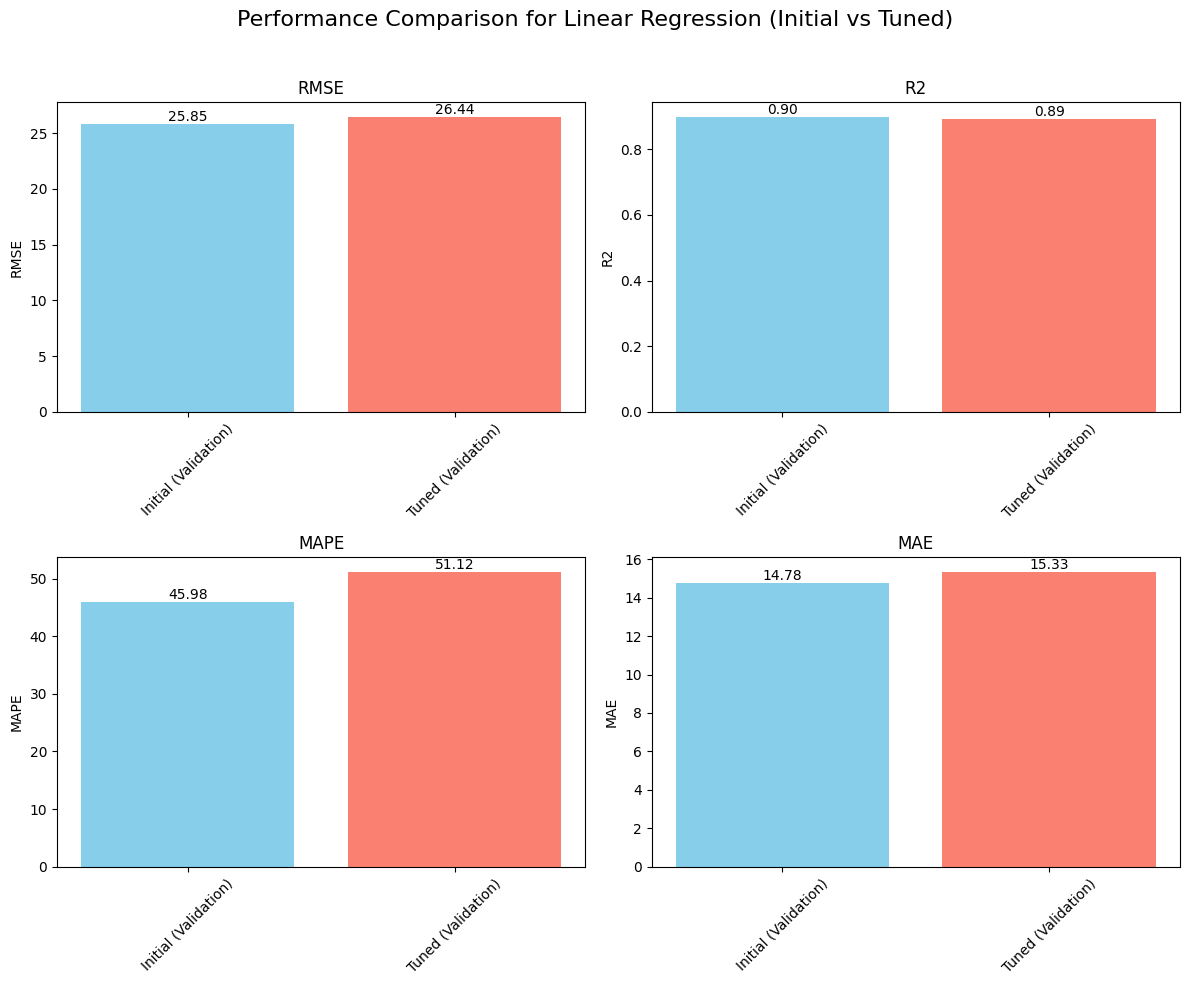

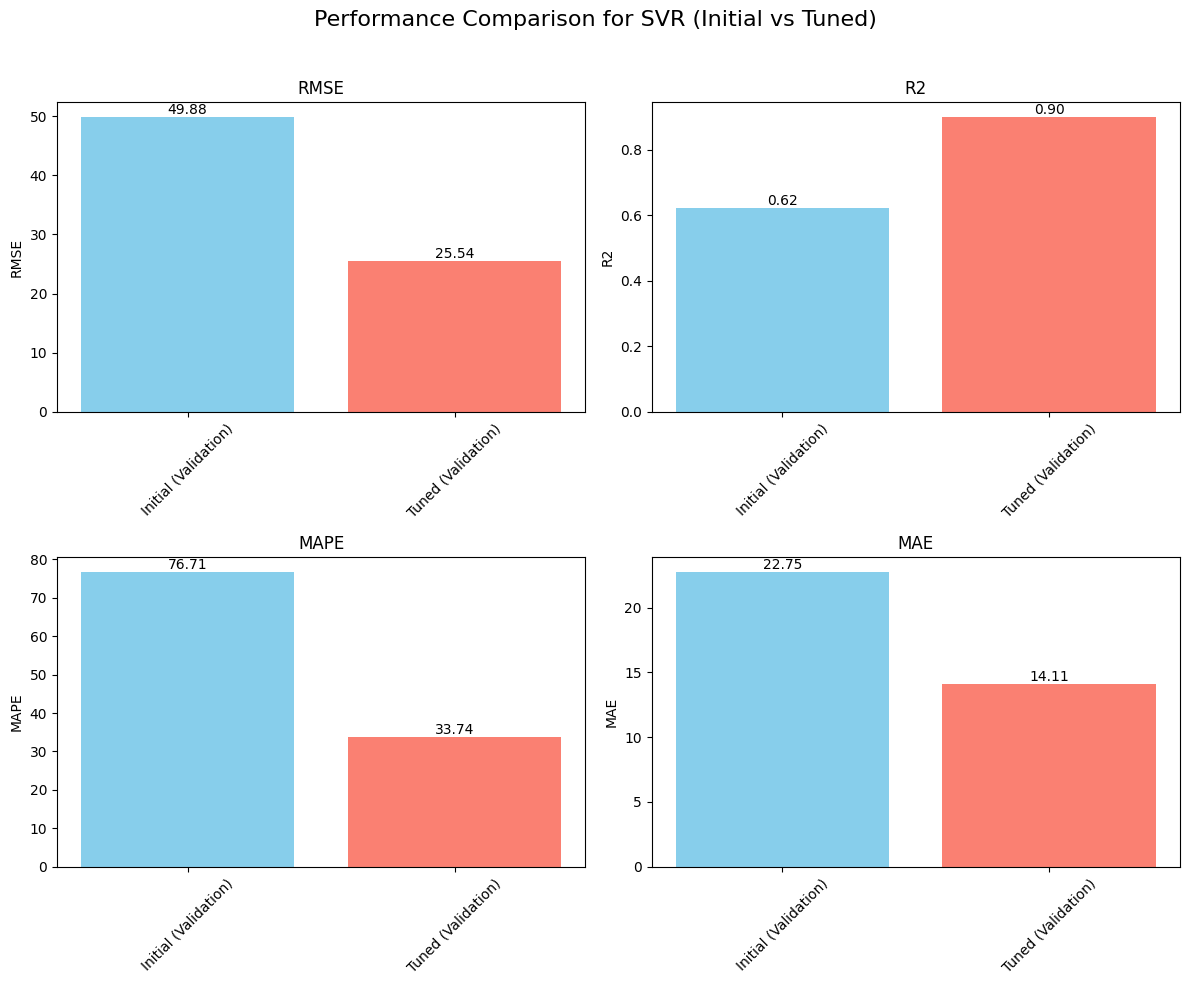

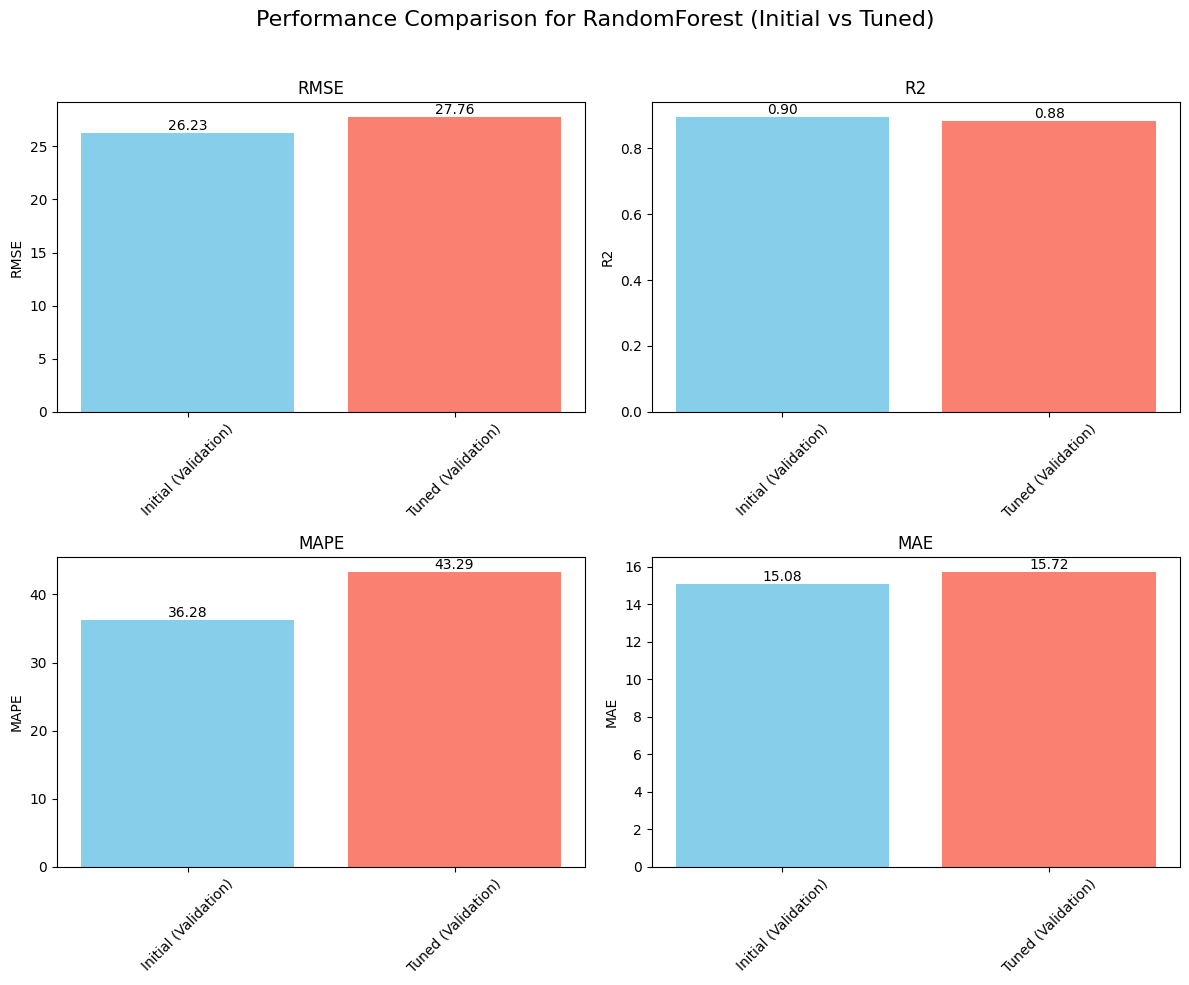

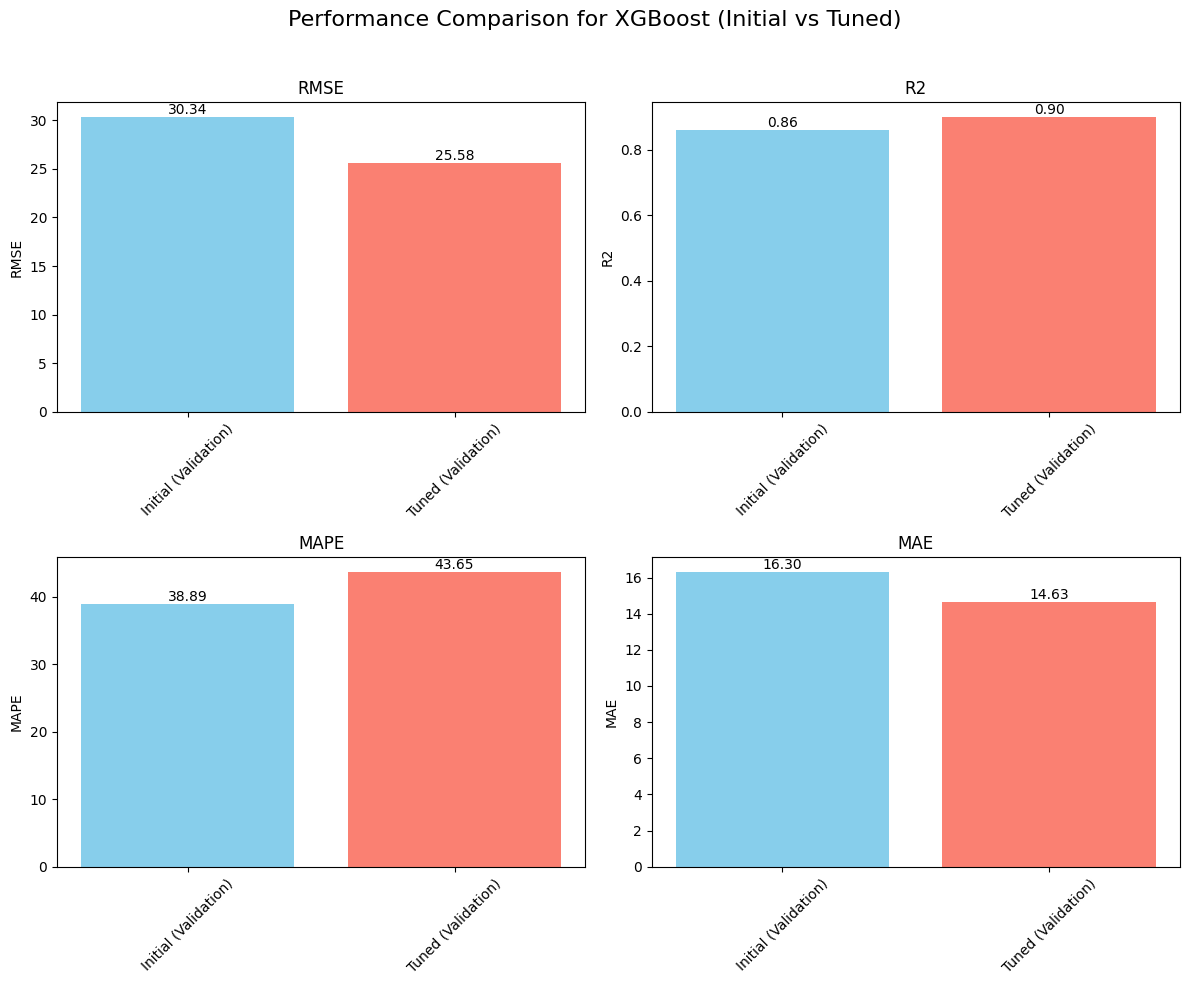

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the baseline and tuned results into a DataFrame
baseline_df = pd.DataFrame(baseline_results).T
tuned_df = pd.DataFrame(tuned_results).T

# Define the metrics we want to plot
metrics = ["RMSE", "R2", "MAPE", "MAE"]

# Plot the results for each model
for model_name in baseline_results.keys():
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Performance Comparison for {model_name} (Initial vs Tuned)", fontsize=16)


    for i, metric in enumerate(metrics):
        row, col = divmod(i, 2)

        # Extract the baseline and tuned values for the current metric
        baseline_val = baseline_results[model_name]["Validation"][metric]


        if model_name == "Linear Regression":
            tuned_val = tuned_results["Ridge Regression"]["Validation"][metric]
        else:
            tuned_val = tuned_results[model_name]["Validation"][metric]

        # Data for the bars
        values = [baseline_val,tuned_val]
        labels = ["Initial (Validation)", "Tuned (Validation)"]

        # Create the bar plot for each metric
        bars = ax[row, col].bar(labels, values, color=['skyblue', 'salmon'])
        ax[row, col].set_title(metric)
        ax[row, col].set_ylabel(metric)
        ax[row, col].tick_params(axis='x', rotation=45)

        # Add value labels on top of each bar
        for bar, value in zip(bars, values):
            ax[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                              f'{value:.2f}', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()


### Cross Validation based on best on best hyperparameter tuning

In [ ]:
# Best parameters for Ridge Regression: {'alpha': 100}
# Best parameters for SVR: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
# Best parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
# Best parameters for XGBoost: {'reg_lambda': 13, 'reg_alpha': 5, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.05}

In [114]:
# Models best parameters
reg_models = {
    "RandomForest": RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 'log2', min_samples_split= 10, n_estimators= 300, random_state = 42), #based on hyperparameter tuning,
    "SVR": SVR(kernel="linear", C=1, gamma = 'scale'), #hyperparameter tuning result
    "LinearRegression": LinearRegression(), #base model is better
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=1, learning_rate = 0.05, reg_lambda = 13,reg_alpha = 5 ,random_state = 42),  #hyperparameter tuning result{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
}

In [115]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Define custom scoring functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


# Initialize GroupKFold
group_kfold = GroupKFold(n_splits=5)

# Placeholder for results
fold_results = []

# Iterate over each model
for model_name, model in reg_models.items():
    # Create a pipeline for preprocessing and modeling
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Scale features
        ("model", model)               # Model
    ])
    
    # Perform GroupKFold cross-validation
    groups = train["Stock ID"]  # Ensure groups are defined
    fold_idx = 1  # To track fold numbers

    for train_idx, val_idx in group_kfold.split(X_train, y_train_next_year, groups=groups):
        # Split the data into training and validation sets for the current fold
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_next_year.iloc[train_idx], y_train_next_year.iloc[val_idx]
        
        # Scale the features based on the training set
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        
        # Train the model on the current fold
        model.fit(X_train_fold_scaled, y_train_fold)
        
        # Predict on the validation set
        y_pred_val = model.predict(X_val_fold_scaled)
        
        # Calculate metrics for the current fold
        r2 = r2_score(y_val_fold, y_pred_val)
        rmse_val = rmse(y_val_fold, y_pred_val)
        mae_val = mean_absolute_error(y_val_fold, y_pred_val)
        mape_val = mean_absolute_percentage_error(y_val_fold, y_pred_val)*100
        
        # Store results for the current fold
        fold_results.append({
            "Model": model_name,
            "Fold": fold_idx,
            "R²": r2,
            "RMSE": rmse_val,
            "MAE": mae_val,
            "MAPE (%)": mape_val
        })
        
        fold_idx += 1

# Convert results to a DataFrame
fold_results_df = pd.DataFrame(fold_results)

# Print detailed results for all folds
print(fold_results_df)

# Optional: Aggregate results for easier comparison
aggregated_results = fold_results_df.groupby("Model").agg(
    Mean_R2=("R²", "mean"),
    Std_R2=("R²", "std"),
    Mean_RMSE=("RMSE", "mean"),
    Std_RMSE=("RMSE", "std"),
    Mean_MAE=("MAE", "mean"),
    Std_MAE=("MAE", "std"),
    Mean_MAPE=("MAPE (%)", "mean"),
    Std_MAPE=("MAPE (%)", "std")
).reset_index()

# Display aggregated results
print(aggregated_results)


               Model  Fold        R²        RMSE        MAE     MAPE (%)
0       RandomForest     1  0.877585   25.821786  15.680803    43.341690
1       RandomForest     2  0.926991   17.782128  10.705401   208.122548
2       RandomForest     3  0.868903   28.840949  17.805656    25.965794
3       RandomForest     4  0.893356   26.120219  14.936760    25.424120
4       RandomForest     5  0.883602   28.841954  15.489009    28.707753
5                SVR     1  0.875971   25.991451  14.988738    26.311119
6                SVR     2  0.916623   19.002882  10.745571   701.226731
7                SVR     3  0.875991   28.050481  17.799676    23.918130
8                SVR     4  0.872337   28.578696  14.965901    22.694104
9                SVR     5  0.917439   24.290730  13.671059    25.881145
10  LinearRegression     1  0.887265   24.779812  14.444035    34.353353
11  LinearRegression     2  0.832418   26.940731  13.314068  1341.724823
12  LinearRegression     3  0.884306   27.093744  1

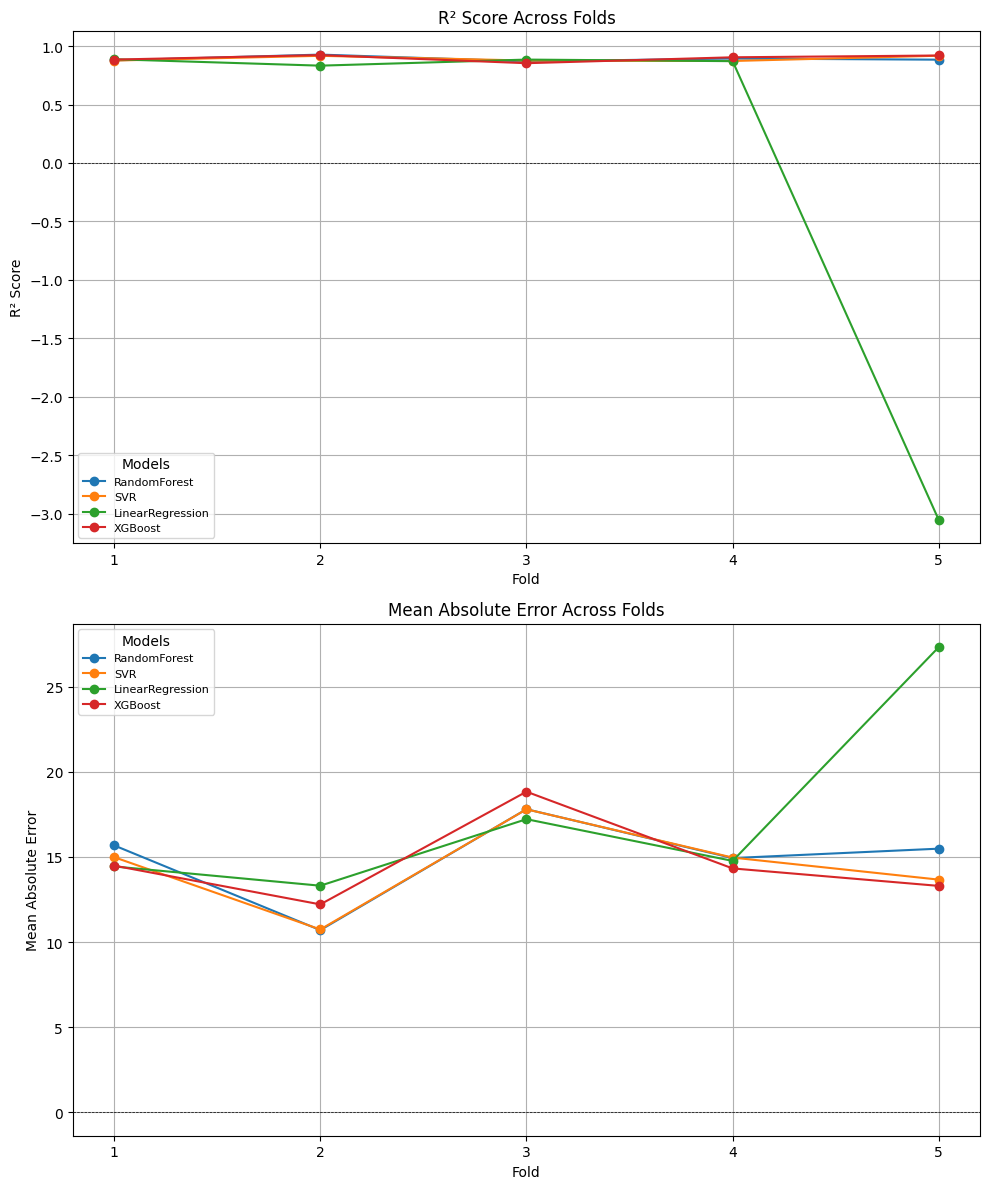

In [116]:
import matplotlib.pyplot as plt

# Define metrics and their labels
metrics = {
    "R²": "R² Score",
    # "RMSE": "Root Mean Squared Error",
    "MAE": "Mean Absolute Error"
    # "MAPE (%)": "Mean Absolute Percentage Error (%)"
}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2,1, figsize=(10, 12))
axes = axes.flatten()

# Define fold numbers (1-5)
folds = [1, 2, 3, 4, 5]

# Iterate over metrics and plot them
for idx, (metric, label) in enumerate(metrics.items()):
    ax = axes[idx]
    for model_name in fold_results_df['Model'].unique():
        model_data = fold_results_df[fold_results_df['Model'] == model_name]
        ax.plot(folds, model_data[metric], marker='o', label=model_name)  # Use 'folds' for x-axis
    
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Baseline
    ax.set_title(f"{label} Across Folds")
    ax.set_xticks(folds) 
    ax.set_xlabel("Fold")
    ax.set_ylabel(label)
    ax.legend(title="Models", fontsize=8)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('Cross Validations Result.pdf')
plt.show()


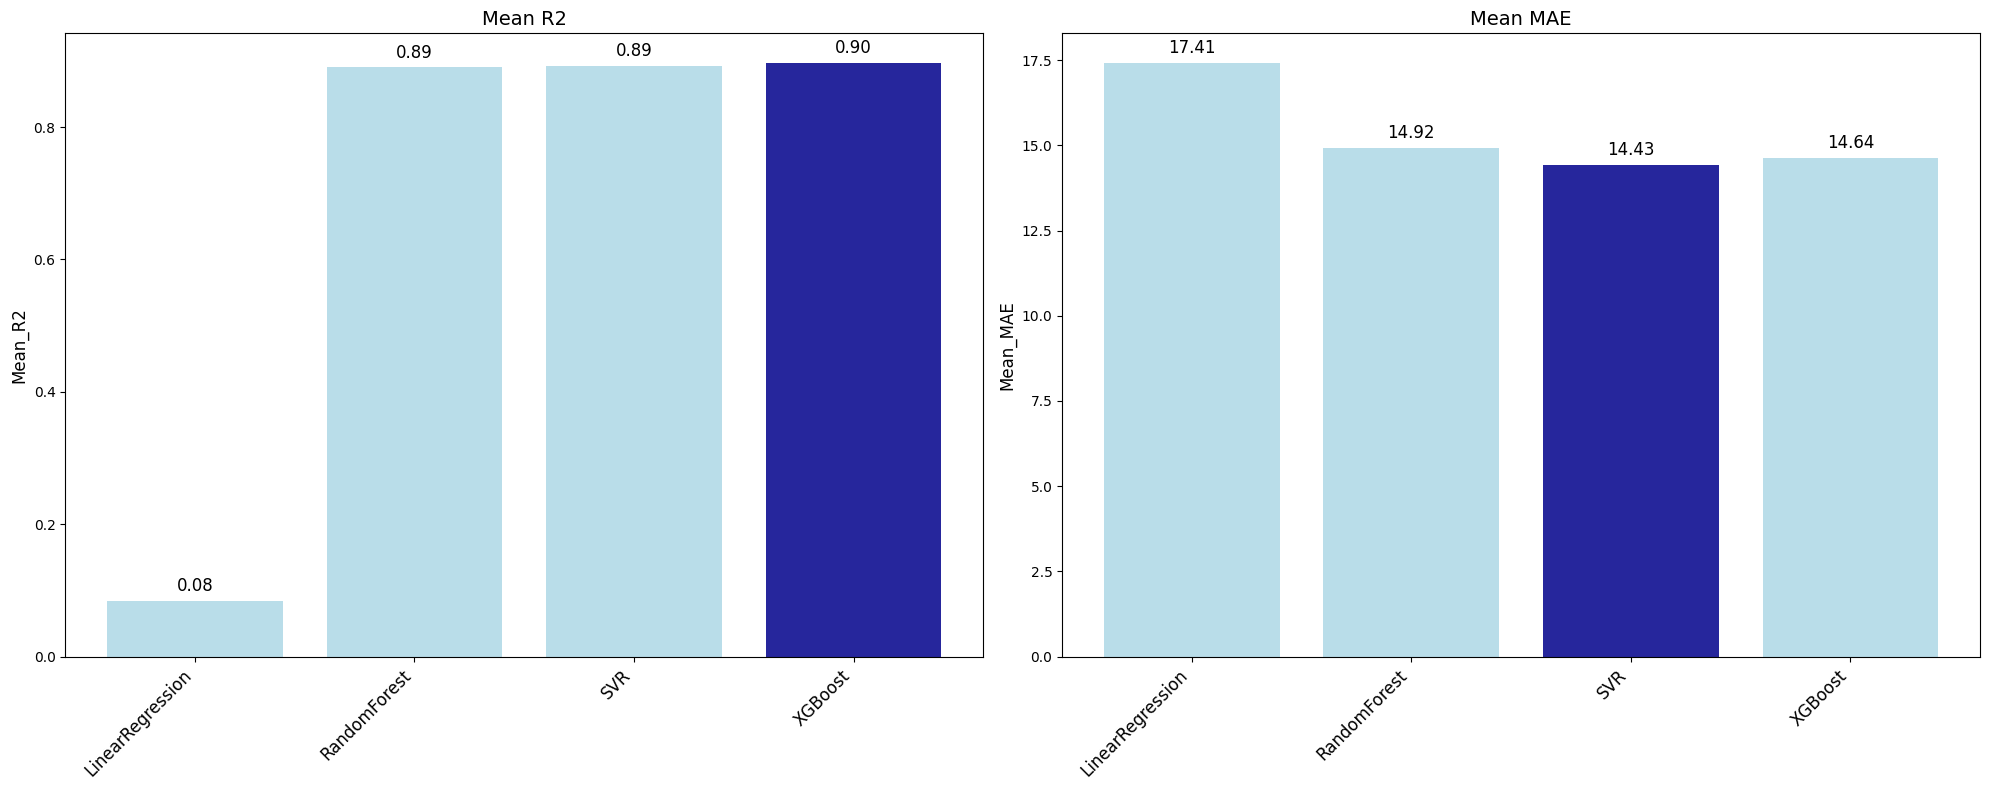

In [117]:
# Metrics to visualize
metrics = ["Mean_R2", "Mean_MAE"]

# Determine the best model for each metric
best_models = {}
for metric in metrics:
    if metric == "Mean_R2":
        best_models[metric] = aggregated_results.loc[aggregated_results[metric].idxmax(), "Model"]
    else:
        best_models[metric] = aggregated_results.loc[aggregated_results[metric].idxmin(), "Model"]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

colors = {"default": "lightblue", "best": "darkblue"}

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Get colors based on the best model
    bar_colors = [
        colors["best"] if model == best_models[metric] else colors["default"]
        for model in aggregated_results["Model"]
    ]
    
    # Plot bar chart
    bars = ax.bar(
        aggregated_results["Model"],
        aggregated_results[metric],
        color=bar_colors,
        alpha=0.85
    )
    
    # Add labels
    ax.set_title(metric.replace("_", " "), fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(range(len(aggregated_results["Model"])))
    ax.set_xticklabels(aggregated_results["Model"], rotation=45, ha="right", fontsize=12)
    
    # Add metric values on top of bars
    for bar, value in zip(bars, aggregated_results[metric]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01 * max(aggregated_results[metric]),
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=12
        )

# Adjust layout
plt.tight_layout()
plt.savefig('Best Performing Model after Hyperparameter Tuning and CV.pdf')
plt.show()

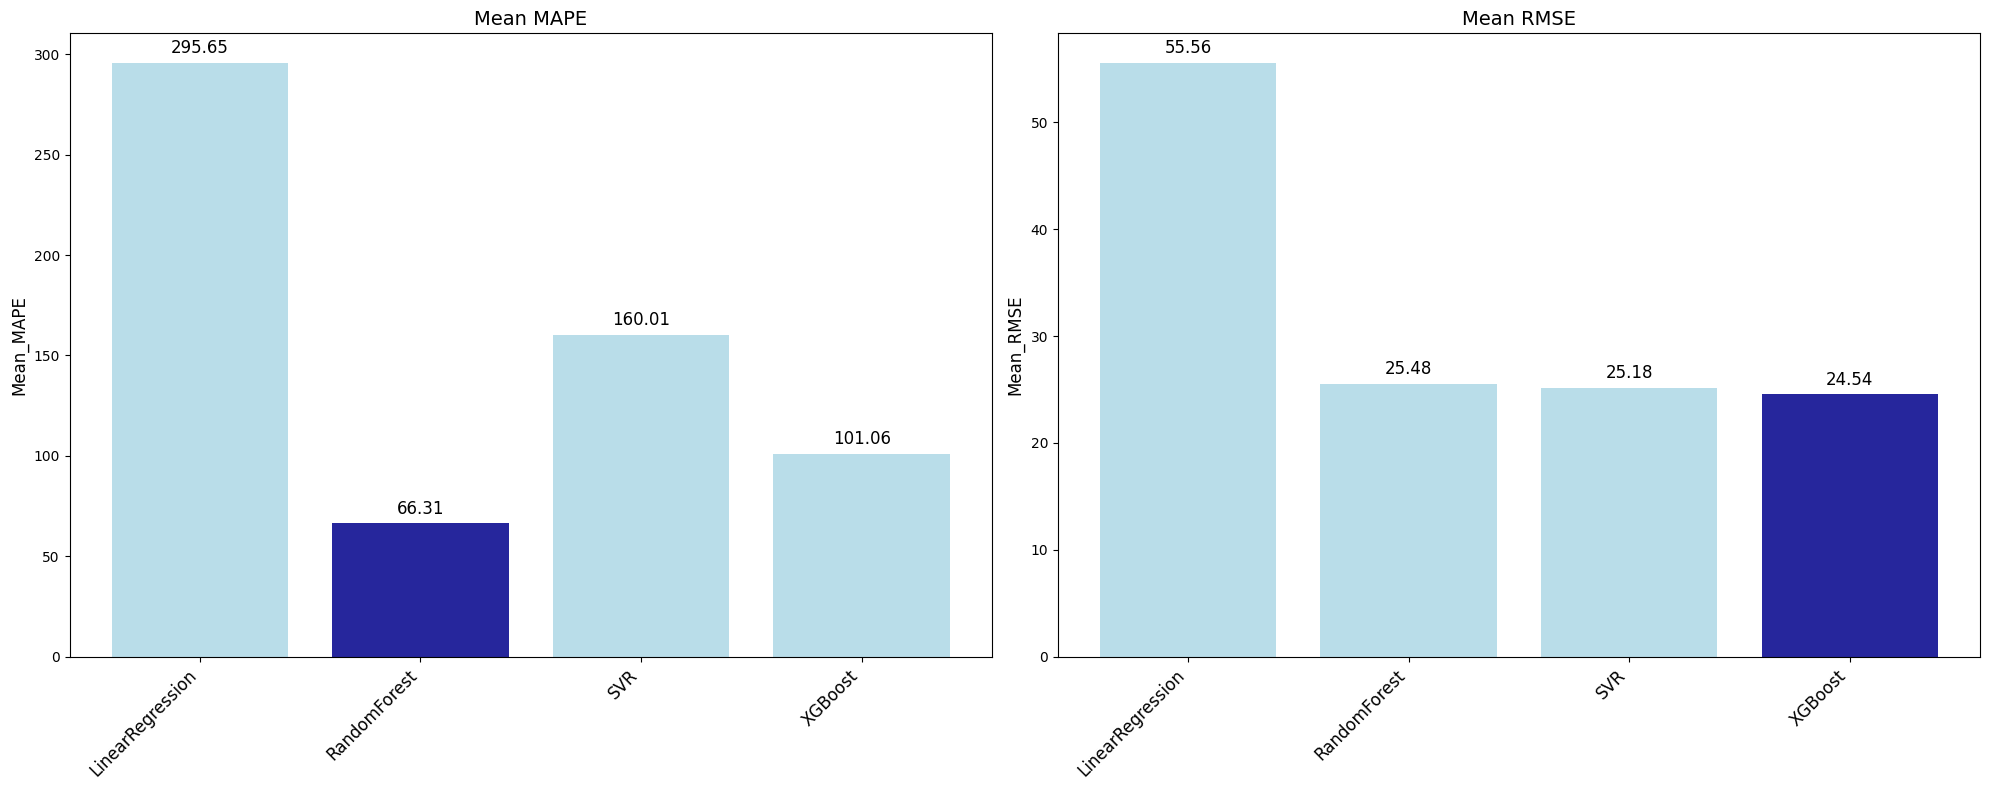

In [118]:
# Metrics to visualize
metrics = ["Mean_MAPE", "Mean_RMSE"]

# Determine the best model for each metric
best_models = {}
for metric in metrics:
    if metric == "Mean_R2":
        best_models[metric] = aggregated_results.loc[aggregated_results[metric].idxmax(), "Model"]
    else:
        best_models[metric] = aggregated_results.loc[aggregated_results[metric].idxmin(), "Model"]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

colors = {"default": "lightblue", "best": "darkblue"}

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Get colors based on the best model
    bar_colors = [
        colors["best"] if model == best_models[metric] else colors["default"]
        for model in aggregated_results["Model"]
    ]
    
    # Plot bar chart
    bars = ax.bar(
        aggregated_results["Model"],
        aggregated_results[metric],
        color=bar_colors,
        alpha=0.85
    )
    
    # Add labels
    ax.set_title(metric.replace("_", " "), fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(range(len(aggregated_results["Model"])))
    ax.set_xticklabels(aggregated_results["Model"], rotation=45, ha="right", fontsize=12)
    
    # Add metric values on top of bars
    for bar, value in zip(bars, aggregated_results[metric]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01 * max(aggregated_results[metric]),
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=12
        )

# Adjust layout
plt.tight_layout()
plt.savefig('Best Performing Model after Hyperparameter Tuning and CV_2.pdf')
plt.show()

Root Mean Squared Error: 29.41
R-squared Score: 0.868
Mean Aboslute Percentage Error: 32.67%
Mean Aboslute Error: 16.2


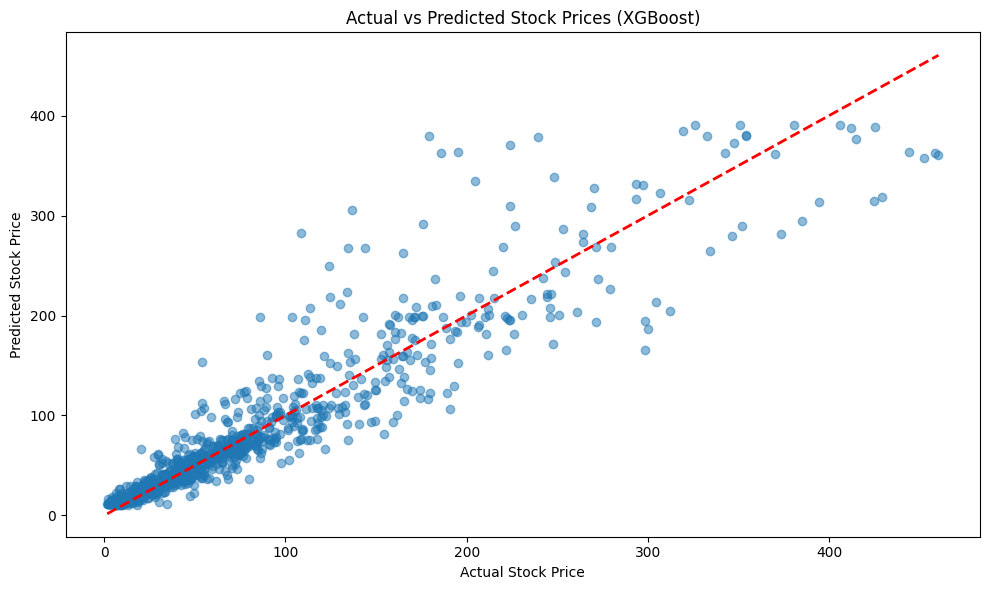

In [119]:
## Retrain the best model using best parameters - in this case XGBoost

best_model = reg_models['XGBoost']

best_model.fit(X_train_final, y_train_next_year)

#Metrics evaluation

# #make predictions on test data
xgb_test_pred = best_model.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test_next_year, xgb_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_next_year, xgb_test_pred)
mae = mean_absolute_error(y_test_next_year, xgb_test_pred)
mape = mean_absolute_percentage_error(y_test_next_year, xgb_test_pred)*100

xgb_rmse = rmse
xgb_r2 = r2
xgb_mape = mape
xgb_mae = mae

print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_next_year, xgb_test_pred, alpha=0.5)
plt.plot([y_test_next_year.min(), y_test_next_year.max()], [y_test_next_year.min(), y_test_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (XGBoost)")
plt.tight_layout()
plt.show()

Root Mean Squared Error: 28.07
R-squared Score: 0.879
Mean Aboslute Percentage Error: 29.54%
Mean Aboslute Error: 15.75


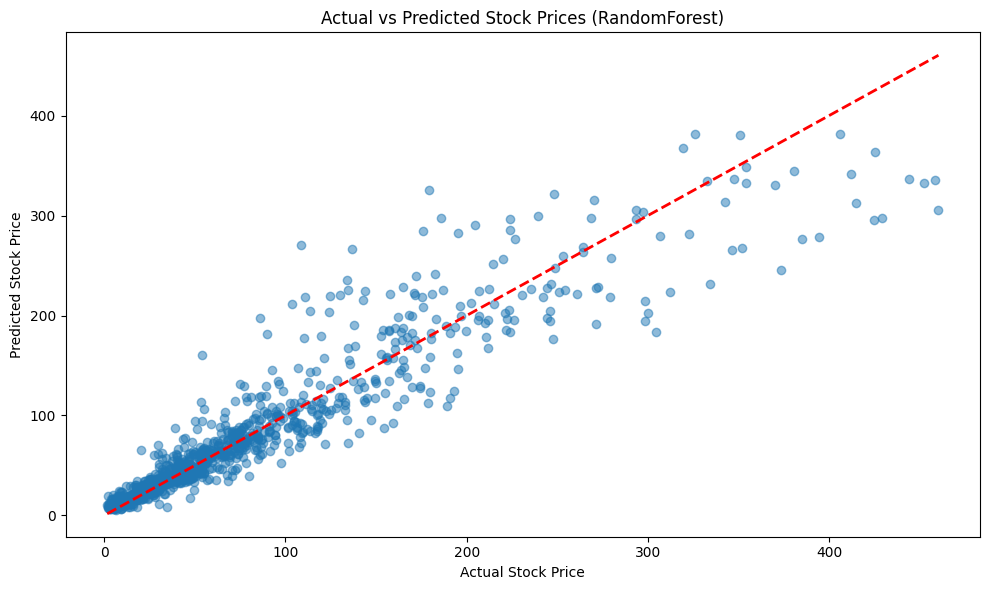

In [120]:
## Retrain the best model using best parameters - in this case XGBoost

rf_model_tuned = reg_models['RandomForest']

rf_model_tuned.fit(X_train_final, y_train_next_year)

#Metrics evaluation

# #make predictions on test data
rf_best_predict = rf_model_tuned.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test_next_year, rf_best_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_next_year, rf_best_predict)
mae = mean_absolute_error(y_test_next_year, rf_best_predict)
mape = mean_absolute_percentage_error(y_test_next_year, rf_best_predict)*100

rf_rmse = rmse
rf_r2 = r2
rf_mape = mape
rf_mae = mae

print(f"Root Mean Squared Error: {round(rf_rmse,2)}")
print(f"R-squared Score: {round(rf_r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(rf_mape,2)}%")
print(f"Mean Aboslute Error: {round(rf_mae,2)}")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_next_year, rf_best_predict, alpha=0.5)
plt.plot([y_test_next_year.min(), y_test_next_year.max()], [y_test_next_year.min(), y_test_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (RandomForest)")
plt.tight_layout()
plt.show()

Root Mean Squared Error: 35.68
R-squared Score: 0.805
Mean Aboslute Percentage Error: 36.67%
Mean Aboslute Error: 17.93


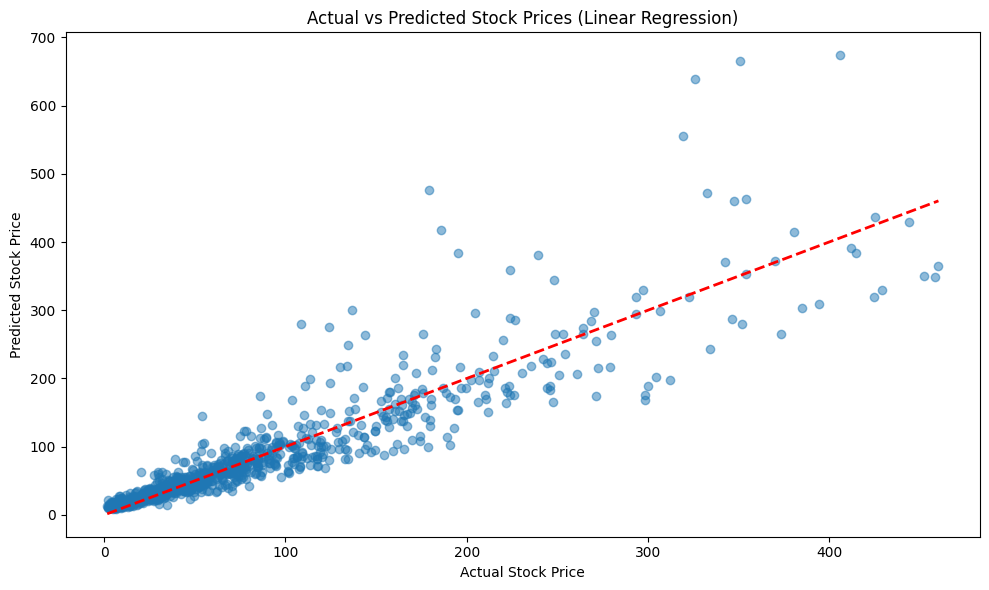

In [61]:
## Retrain the best model using best parameters - in this case XGBoost

lr_best_model = reg_models['LinearRegression']

lr_best_model.fit(X_train_final, y_train_next_year)

#Metrics evaluation

# #make predictions on test data
lr_best_pred = lr_best_model.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test_next_year, lr_best_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_next_year, lr_best_pred)
mae = mean_absolute_error(y_test_next_year, lr_best_pred)
mape = mean_absolute_percentage_error(y_test_next_year, lr_best_pred)*100

lr_rmse = rmse
lr_r2 = r2
lr_mape = mape
lr_mae = mae

print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_next_year, lr_best_pred, alpha=0.5)
plt.plot([y_test_next_year.min(), y_test_next_year.max()], [y_test_next_year.min(), y_test_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (Linear Regression)")
plt.tight_layout()
plt.show()

Root Mean Squared Error: 35.94
R-squared Score: 0.802
Mean Aboslute Percentage Error: 28.19%
Mean Aboslute Error: 17.14


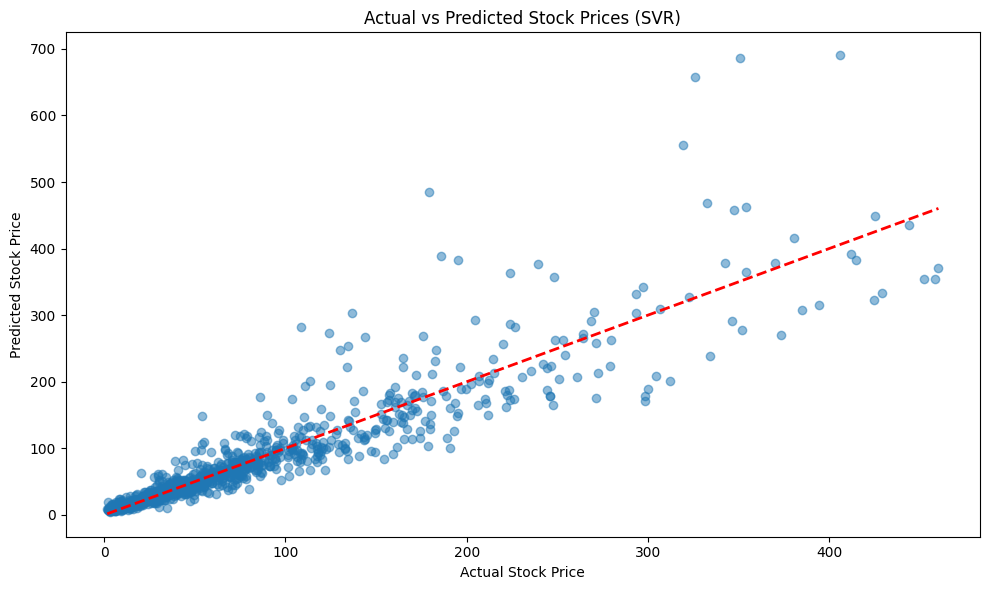

In [62]:
## Retrain the best model using best parameters - in this case XGBoost

svr_best_model = reg_models['SVR']

svr_best_model.fit(X_train_final, y_train_next_year)

#Metrics evaluation

# #make predictions on test data
svr_best_pred = svr_best_model.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test_next_year, svr_best_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_next_year, svr_best_pred)
mae = mean_absolute_error(y_test_next_year, svr_best_pred)
mape = mean_absolute_percentage_error(y_test_next_year, svr_best_pred)*100

svr_rmse = rmse
svr_r2 = r2
svr_mape = mape
svr_mae = mae

print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared Score: {round(r2,3)}")
print(f"Mean Aboslute Percentage Error: {round(mape,2)}%")
print(f"Mean Aboslute Error: {round(mae,2)}")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_next_year, svr_best_pred, alpha=0.5)
plt.plot([y_test_next_year.min(), y_test_next_year.max()], [y_test_next_year.min(), y_test_next_year.max()], 'r--', lw=2)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices (SVR)")
plt.tight_layout()
plt.show()

### Train LSTM Model

### LSTM - Model 1

In [63]:
# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale feature data (X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Scale target data (y)
y_train_final = scaler_y.fit_transform(y_train_next_year.values.reshape(-1, 1))
y_val_final = scaler_y.transform(y_val_next_year.values.reshape(-1, 1))
y_test_final = scaler_y.transform(y_test_next_year.values.reshape(-1, 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Reshape data for LSTM (samples, timesteps, features)
X_train_final_lstm = np.reshape(X_train_final.values, (X_train_final.shape[0], 1, X_train_final.shape[1]))
X_val_final_lstm = np.reshape(X_val_final.values, (X_val_final.shape[0], 1, X_val_final.shape[1]))
X_test_final_lstm = np.reshape(X_test_final.values, (X_test_final.shape[0], 1, X_test_final.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, recurrent_dropout=0.2, input_shape=(X_train_final_lstm.shape[1], X_train_final_lstm.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train_final_lstm, y_train_final, epochs=50, batch_size=32, validation_data=(X_val_final_lstm, y_val_final), verbose=1)

# Evaluate on validation set
y_val_pred = model.predict(X_val_final_lstm)

# Inverse transform predictions and true values
y_val_pred_rescaled = scaler_y.inverse_transform(y_val_pred)
y_val_rescaled = scaler_y.inverse_transform(y_val_final)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val_rescaled, y_val_pred_rescaled)
rmse_val = np.sqrt(mean_squared_error(y_val_rescaled, y_val_pred_rescaled))
r2_val = r2_score(y_val_rescaled, y_val_pred_rescaled)
mape_val = np.mean(np.abs((y_val_rescaled - y_val_pred_rescaled) / y_val_rescaled)) * 100

print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Validation R²: {r2_val:.3f}")
print(f"Validation MAE: {mae_val:.2f}")
print(f"Validation MAPE: {mape_val:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        14,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,851 (136.14 KB)

 Trainable params: 34,851 (136.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7434 - mae: 0.5677 - val_loss: 0.1519 - val_mae: 0.2389
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1283 - mae: 0.2340 - val_loss: 0.1424 - val_mae: 0.2311
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1143 - mae: 0.2167 - val_loss: 0.1385 - val_mae: 0.2290
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1161 - mae: 0.2099 - val_loss: 0.1329 - val_mae: 0.2149
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1119 - mae: 0.2129 - val_loss: 0.1336 - val_mae: 0.2192
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1168 - mae: 0.2095 - val_loss: 0.1343 - val_mae: 0.2190
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0955 - mae: 0.1987 - val_loss: 0.1334 - val_mae: 0.2153
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1056 - mae: 0.2049 - val_loss: 0.1308 - val_mae: 0.2128
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0985 - mae: 

In [64]:
# Define the second LSTM model
model2 = Sequential()
model2.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_final_lstm.shape[1], X_train_final_lstm.shape[2])))
model2.add(Dropout(0.4))
model2.add(LSTM(units=75, return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))  # Output layer for regression

# Compile the second model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model2.summary()

# Train the second model
history2 = model2.fit(X_train_final_lstm, y_train_final, epochs=50, batch_size=32, validation_data=(X_val_final_lstm, y_val_final), verbose=1)

# Evaluate on validation set
y_val_pred2 = model2.predict(X_val_final_lstm)

# Inverse transform predictions and true values
y_val_pred2_rescaled = scaler_y.inverse_transform(y_val_pred2)
y_val_rescaled2 = scaler_y.inverse_transform(y_val_final)

# Calculate evaluation metrics for validation set
mae_val2 = mean_absolute_error(y_val_rescaled2, y_val_pred2_rescaled)
rmse_val2 = np.sqrt(mean_squared_error(y_val_rescaled2, y_val_pred2_rescaled))
r2_val2 = r2_score(y_val_rescaled2, y_val_pred2_rescaled)
mape_val2 = np.mean(np.abs((y_val_rescaled2 - y_val_pred2_rescaled) / y_val_rescaled2)) * 100

print(f"Model 2 Validation RMSE: {rmse_val2:.2f}")
print(f"Model 2 Validation R²: {r2_val2:.3f}")
print(f"Model 2 Validation MAE: {mae_val2:.2f}")
print(f"Model 2 Validation MAPE: {mape_val2:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 100)         │        49,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 75)          │        52,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,251 (497.07 KB)

 Trainable params: 127,251 (497.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.8385 - mae: 0.5777 - val_loss: 0.1547 - val_mae: 0.2473
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1286 - mae: 0.2241 - val_loss: 0.1390 - val_mae: 0.2314
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1119 - mae: 0.2084 - val_loss: 0.1402 - val_mae: 0.2294
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1179 - mae: 0.2119 - val_loss: 0.1485 - val_mae: 0.2297
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - mae: 0.1973 - val_loss: 0.1264 - val_mae: 0.2131
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1113 - mae: 0.2027 - val_loss: 0.1277 - val_mae: 0.2134
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0910 - mae: 0.1948 - val_loss: 0.1276 - val_mae: 0.2072
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1003 - mae: 0.1941 - val_loss: 0.1267 - val_mae: 0.2025
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0926 - mae:

In [65]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adagrad,Nadam

# Define the second LSTM model
model3 = Sequential()
model3.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_final_lstm.shape[1], X_train_final_lstm.shape[2])))
model3.add(Dropout(0.4))
model3.add(LSTM(units=75, return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=50, return_sequences=False))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())  # Normalize activations
model3.add(Dense(units=1))  # Output layer for regression

# Compile the second model
model3.compile(optimizer=Nadam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model3.summary()

# Train the second model
history3 = model3.fit(X_train_final_lstm, y_train_final, epochs=50, batch_size=32, validation_data=(X_val_final_lstm, y_val_final), verbose=1)

# Evaluate on validation set
y_val_pred3 = model3.predict(X_val_final_lstm)

# Inverse transform predictions and true values
y_val_pred3_rescaled = scaler_y.inverse_transform(y_val_pred3)
y_val_rescaled3 = scaler_y.inverse_transform(y_val_final)

# Calculate evaluation metrics for validation set
mae_val3 = mean_absolute_error(y_val_rescaled3, y_val_pred3_rescaled)
rmse_val3 = np.sqrt(mean_squared_error(y_val_rescaled3, y_val_pred3_rescaled))
r2_val3 = r2_score(y_val_rescaled3, y_val_pred3_rescaled)
mape_val3 = np.mean(np.abs((y_val_rescaled3 - y_val_pred3_rescaled) / y_val_rescaled3)) * 100

print(f"Model 3 Validation RMSE: {rmse_val3:.2f}")
print(f"Model 3 Validation R²: {r2_val3:.3f}")
print(f"Model 3 Validation MAE: {mae_val3:.2f}")
print(f"Model 3 Validation MAPE: {mape_val3:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 1, 100)         │        49,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1, 75)          │        52,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,451 (497.86 KB)

 Trainable params: 127,351 (497.46 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.4756 - mae: 0.4251 - val_loss: 0.9799 - val_mae: 0.6979
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1636 - mae: 0.2748 - val_loss: 0.9411 - val_mae: 0.6895
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1659 - mae: 0.2796 - val_loss: 0.8358 - val_mae: 0.6544
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1614 - mae: 0.2723 - val_loss: 0.7598 - val_mae: 0.6043
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1241 - mae: 0.2373 - val_loss: 0.5712 - val_mae: 0.5264
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1603 - mae: 0.2657 - val_loss: 0.3395 - val_mae: 0.3946
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1357 - mae: 0.2652 - val_loss: 0.2748 - val_mae: 0.3304
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1388 - mae: 0.2557 - val_loss: 0.2176 - val_mae: 0.2772
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1297 - mae:

### Test LSTM on Fold

In [66]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming model, model2, and model3 are already defined
models = [model, model2, model3]  # List of pre-trained LSTM models

# Define GroupKFold
group_kfold = GroupKFold(n_splits=5)
groups = train["Stock ID"].values

# Store metrics for each fold and model
cv_results = {'model': [], 'fold': [], 'r2': [], 'rmse': [], 'mae': [], 'mape': []}

for i, lstm_model in enumerate(models, start=1):  # Loop through pre-trained models
    print(f"Evaluating Model {i}")

    for fold, (train_idx, val_idx) in enumerate(group_kfold.split(X_train_final_lstm, y_train_final, groups=groups)):
        print(f"Model {i} - Fold {fold + 1}")
        
        # Split data into training and validation sets
        X_train_fold = X_train_final_lstm[train_idx]
        y_train_fold = y_train_final[train_idx]
        X_val_fold = X_train_final_lstm[val_idx]
        y_val_fold = y_train_final[val_idx]
        
        # Reinitialize the weights of the pre-trained model (optional, to reset for each fold)
        lstm_model.set_weights(lstm_model.get_weights())
        
        # Retrain the model on the fold-specific training data
        lstm_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=1, validation_data=(X_val_fold, y_val_fold))
        
        # Predict the validation set
        y_val_pred = lstm_model.predict(X_val_fold)
        
        # Inverse transform predictions and true values
        y_val_pred_rescaled = scaler_y.inverse_transform(y_val_pred)
        y_val_fold_rescaled = scaler_y.inverse_transform(y_val_fold)
        y_val_fold_rescaled = np.where(y_val_fold_rescaled == 0, 1e-6, y_val_fold_rescaled)
        
        # Calculate metrics
        r2 = r2_score(y_val_fold_rescaled, y_val_pred_rescaled)
        rmse = np.sqrt(mean_squared_error(y_val_fold_rescaled, y_val_pred_rescaled))
        mae = mean_absolute_error(y_val_fold_rescaled, y_val_pred_rescaled)
        mape = np.mean(np.abs((y_val_fold_rescaled - y_val_pred_rescaled) / y_val_fold_rescaled)) * 100
        
        # Store metrics
        cv_results['model'].append(f"Model {i}")
        cv_results['fold'].append(fold + 1)
        cv_results['r2'].append(r2)
        cv_results['rmse'].append(rmse)
        cv_results['mae'].append(mae)
        cv_results['mape'].append(mape)
        
        print(f"Model {i} - Fold {fold + 1} - R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.2f}%")

# Print overall results
for i in range(1, len(models) + 1):
    model_results = [cv_results['r2'][j] for j in range(len(cv_results['r2'])) if cv_results['model'][j] == f"Model {i}"]
    print(f"Model {i} - Average R²: {np.mean(model_results):.3f}")


Evaluating Model 1
Model 1 - Fold 1
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0813 - mae: 0.1791 - val_loss: 0.0776 - val_mae: 0.1634
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0829 - mae: 0.1763 - val_loss: 0.0765 - val_mae: 0.1601
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0901 - mae: 0.1852 - val_loss: 0.0792 - val_mae: 0.1643
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0821 - mae: 0.1771 - val_loss: 0.0801 - val_mae: 0.1673
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0948 - mae: 0.1865 - val_loss: 0.0797 - val_mae: 0.1659
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0659 - mae: 0.1626 - val_loss: 0.0820 - val_mae: 0.1717
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0738 - mae: 0.1720 - val_loss: 0.0819 - val_mae: 0.1715
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0794 - mae: 0.1807 - val_loss: 0.0856 - val_mae: 0.1756
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━

In [67]:
# Evaluate the model on the test set
y_test_pred2 = model2.predict(X_test_final_lstm)
y_test_pred_rescaled2 = scaler_y.inverse_transform(y_test_pred2)
y_test_rescaled2 = scaler_y.inverse_transform(y_test_final.reshape(-1, 1))

# Calculate evaluation metrics for test set
test_mae2 = mean_absolute_error(y_test_rescaled2, y_test_pred_rescaled2)
test_rmse2 = np.sqrt(mean_squared_error(y_test_rescaled2, y_test_pred_rescaled2))
test_r2_2 = r2_score(y_test_rescaled2, y_test_pred_rescaled2)
test_mape_2 = np.mean(np.abs((y_test_rescaled2 - y_test_pred_rescaled2) / y_test_rescaled2)) * 100

print("\nTest Results:")
print(f"Root Mean Squared Error (RMSE) 2: {round(test_rmse2, 2)}")
print(f"R-squared Score (R²) 2: {round(test_r2_2, 3)}")
print(f"Mean Absolute Percentage Error (MAPE) 2: {round(test_mape_2, 2)}%")
print(f"Mean Absolute Error (MAE) 2: {round(test_mae2, 2)}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Results:
Root Mean Squared Error (RMSE) 2: 37.75
R-squared Score (R²) 2: 0.782
Mean Absolute Percentage Error (MAPE) 2: 30.86%
Mean Absolute Error (MAE) 2: 19.65


In [68]:
# Evaluate the model on the test set
y_test_pred3 = model3.predict(X_test_final_lstm)
y_test_pred_rescaled3 = scaler_y.inverse_transform(y_test_pred3)
y_test_rescaled3 = scaler_y.inverse_transform(y_test_final.reshape(-1, 1))

# Calculate evaluation metrics for test set
test_mae3 = mean_absolute_error(y_test_rescaled3, y_test_pred_rescaled3)
test_rmse3 = np.sqrt(mean_squared_error(y_test_rescaled3, y_test_pred_rescaled3))
test_r2_3 = r2_score(y_test_rescaled3, y_test_pred_rescaled3)
test_mape_3 = np.mean(np.abs((y_test_rescaled3 - y_test_pred_rescaled3) / y_test_rescaled3)) * 100

print("\nTest Results:")
print(f"Root Mean Squared Error (RMSE) 3: {round(test_rmse3, 2)}")
print(f"R-squared Score (R²) 3: {round(test_r2_3, 3)}")
print(f"Mean Absolute Percentage Error (MAPE) 3: {round(test_mape_3, 2)}%")
print(f"Mean Absolute Error (MAE) 3 :{round(test_mae3, 2)}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Results:
Root Mean Squared Error (RMSE) 3: 35.31
R-squared Score (R²) 3: 0.809
Mean Absolute Percentage Error (MAPE) 3: 31.41%
Mean Absolute Error (MAE) 3 :18.86


In [69]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define GroupKFold
group_kfold = GroupKFold(n_splits=5)

groups = train["Stock ID"].values
# Store metrics for each fold
cv_results = {'fold': [], 'r2': [], 'rmse': [], 'mae': [], 'mape': []}

for fold, (train_idx, val_idx) in enumerate(group_kfold.split(X_train_final_lstm, y_train_final, groups=groups)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold = X_train_final_lstm[train_idx]
    y_train_fold = y_train_final[train_idx]
    X_val_fold = X_train_final_lstm[val_idx]
    y_val_fold = y_train_final[val_idx]
    
    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])))
    model.add(Dropout(0.5))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=1, validation_data=(X_val_fold, y_val_fold))
    
    # Predict the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Inverset Transform back to its original scale
    y_val_pred_rescaled = scaler_y.inverse_transform(y_val_pred)
    y_val_fold_rescaled = scaler_y.inverse_transform(y_val_fold)
    y_val_fold_rescaled = np.where(y_val_fold_rescaled == 0, 1e-6, y_val_fold_rescaled)
    
    # Calculate metrics
    r2 = r2_score(y_val_fold_rescaled, y_val_pred_rescaled)
    rmse = np.sqrt(mean_squared_error(y_val_fold_rescaled, y_val_pred_rescaled))
    mae = mean_absolute_error(y_val_fold_rescaled, y_val_pred_rescaled)
    mape = np.mean(np.abs((y_val_fold_rescaled - y_val_pred_rescaled) / y_val_fold_rescaled)) * 100
    
    # Store metrics
    cv_results['fold'].append(fold + 1)
    cv_results['r2'].append(r2)
    cv_results['rmse'].append(rmse)
    cv_results['mae'].append(mae)
    cv_results['mape'].append(mape)
    print(f"Fold {fold + 1} - R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.2f}%")


Fold 1
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.7867 - val_loss: 0.1955
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1506 - val_loss: 0.1508
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1257 - val_loss: 0.1451
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1182 - val_loss: 0.1418
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1273 - val_loss: 0.1391
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1077 - val_loss: 0.1367
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1065 - val_loss: 0.1379
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - val_loss: 0.1339
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987 - val_loss: 0.1321
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1032 - val_loss: 0.1322
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 - val_loss: 0.1331
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - val_loss: 0.1358

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.9024 - val_loss: 0.1048
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1852 - val_loss: 0.0744
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1358 - val_loss: 0.0671
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1265 - val_loss: 0.0674
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1231 - val_loss: 0.0702
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1254 - val_loss: 0.0680
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1353 - val_loss: 0.0674
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1166 - val_loss: 0.0694
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1019 - val_loss: 0.0671
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1146 - val_loss: 0.0669
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0940 - val_loss: 0.0652
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1121 - val_loss: 0.0623


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8690 - val_loss: 0.2446
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1770 - val_loss: 0.1540
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1219 - val_loss: 0.1531
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1022 - val_loss: 0.1461
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1047 - val_loss: 0.1419
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0850 - val_loss: 0.1479
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0944 - val_loss: 0.1379
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0942 - val_loss: 0.1494
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1045 - val_loss: 0.1532
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1107 - val_loss: 0.1329
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0871 - val_loss: 0.1335
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0840 - val_loss: 0.1393


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.9253 - val_loss: 0.1487
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1738 - val_loss: 0.0992
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1323 - val_loss: 0.0952
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1232 - val_loss: 0.0934
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1151 - val_loss: 0.0958
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1156 - val_loss: 0.0942
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1221 - val_loss: 0.0942
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1094 - val_loss: 0.0984
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1028 - val_loss: 0.0933
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1035 - val_loss: 0.1061
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1189 - val_loss: 0.0938
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 - val_loss: 0.0958


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.7227 - val_loss: 0.1837
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1381 - val_loss: 0.1619
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1109 - val_loss: 0.1624
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1254 - val_loss: 0.1574
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0962 - val_loss: 0.1338
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1177 - val_loss: 0.1512
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0942 - val_loss: 0.1344
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1098 - val_loss: 0.1511
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1053 - val_loss: 0.1439
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0963 - val_loss: 0.1544
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0997 - val_loss: 0.1491
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0946 - val_loss: 0.1530


In [70]:
#Best performing models was model 1

# Evaluate the model on the test set
y_test_pred = model.predict(X_test_final_lstm)
y_test_pred_rescaled = scaler_y.inverse_transform(y_test_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_final.reshape(-1, 1))

# Calculate evaluation metrics for test set
test_mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
test_r2 = r2_score(y_test_rescaled, y_test_pred_rescaled)
test_mape = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

print(f"MAE : {test_mae}")
print(f"RMSE : {test_rmse}")
print(f"R2 : {test_r2}")
print(f"MAPE : {test_mape}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE : 17.395578001438093
RMSE : 30.49945656693349
R2 : 0.8577105101865303
MAPE : 36.293732192852794


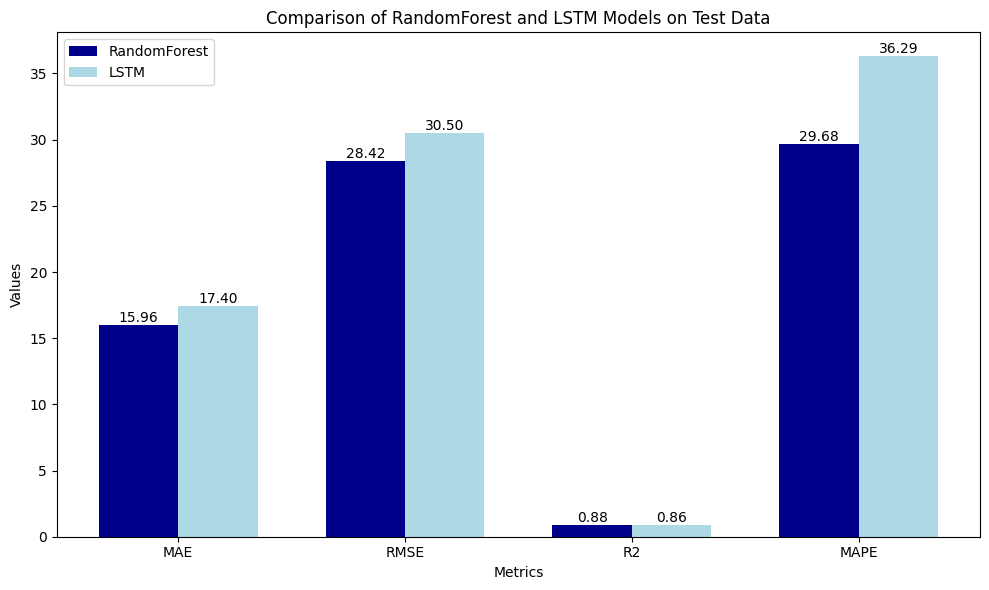

In [71]:
#Visualize Metrics Side by Side

rf_metrics = {
    'MAE' : rf_mae,
    'RMSE' : rf_rmse,
    'R2': rf_r2,
    'MAPE' :rf_mape
}
lstm_metrics = {
    'MAE' : test_mae,
    'RMSE' : test_rmse,
    'R2': test_r2,
    'MAPE' :test_mape
}


# Combine metrics into a dictionary for plotting
comparison_metrics = {
    'Metric': ['MAE', 'RMSE', 'R2', 'MAPE'],
    'RandomForest': [rf_metrics['MAE'], rf_metrics['RMSE'], rf_metrics['R2'], rf_metrics['MAPE']],
    'LSTM': [lstm_metrics['MAE'], lstm_metrics['RMSE'], lstm_metrics['R2'], lstm_metrics['MAPE']]
}

# Identify the best (lower is better for MAE, RMSE, MAPE; higher is better for R2)
best_metrics = [
    min(comparison_metrics['RandomForest'][0], comparison_metrics['LSTM'][0]),  # MAE
    min(comparison_metrics['RandomForest'][1], comparison_metrics['LSTM'][1]),  # RMSE
    max(comparison_metrics['RandomForest'][2], comparison_metrics['LSTM'][2]),  # R2
    min(comparison_metrics['RandomForest'][3], comparison_metrics['LSTM'][3])   # MAPE
]

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(comparison_metrics['Metric']))

# Bars for XGBoost
bars_xgb = ax.bar(
    index - bar_width / 2,
    comparison_metrics['RandomForest'],
    bar_width,
    label='RandomForest',
    color=['darkblue' if metric == best else 'lightblue' for metric, best in zip(comparison_metrics['RandomForest'], best_metrics)]
)

# Bars for LSTM
bars_lstm = ax.bar(
    index + bar_width / 2,
    comparison_metrics['LSTM'],
    bar_width,
    label='LSTM',
    color=['darkblue' if metric == best else 'lightblue' for metric, best in zip(comparison_metrics['LSTM'], best_metrics)]
)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of RandomForest and LSTM Models on Test Data')
ax.set_xticks(index)
ax.set_xticklabels(comparison_metrics['Metric'])
ax.legend()

# Add text annotations for bar values
for bars in [bars_xgb, bars_lstm]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('RF vs LSTM.pdf')
plt.show()

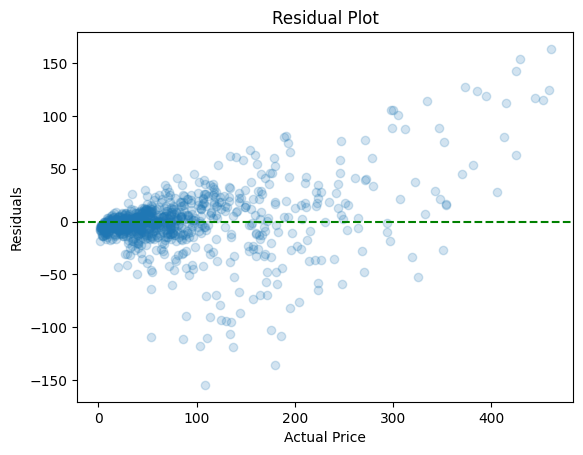

In [73]:
# Plot actual vs predicted values over time
residuals = y_test_next_year - rf_best_predict
plt.scatter(y_test_next_year, residuals, alpha=0.2)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig('Best Model Residual Plot.pdf')
plt.show()


/tmp/ipykernel_31/241990612.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.kdeplot(residuals.ravel(), fill=True, alpha=0.3)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


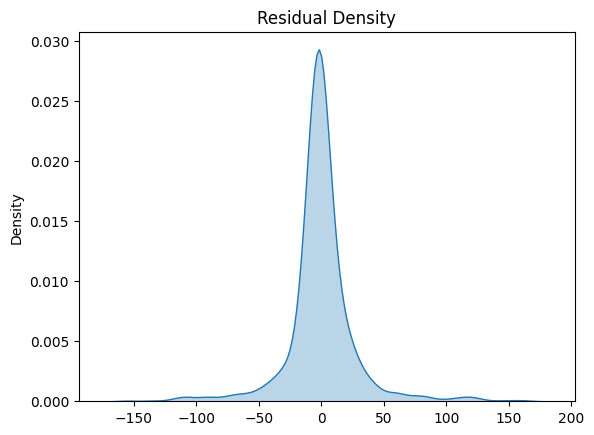

In [74]:
sns.kdeplot(residuals.ravel(), fill=True, alpha=0.3)
plt.title("Residual Density")
plt.show()

#### Performance Marginalization Curves and SHAP

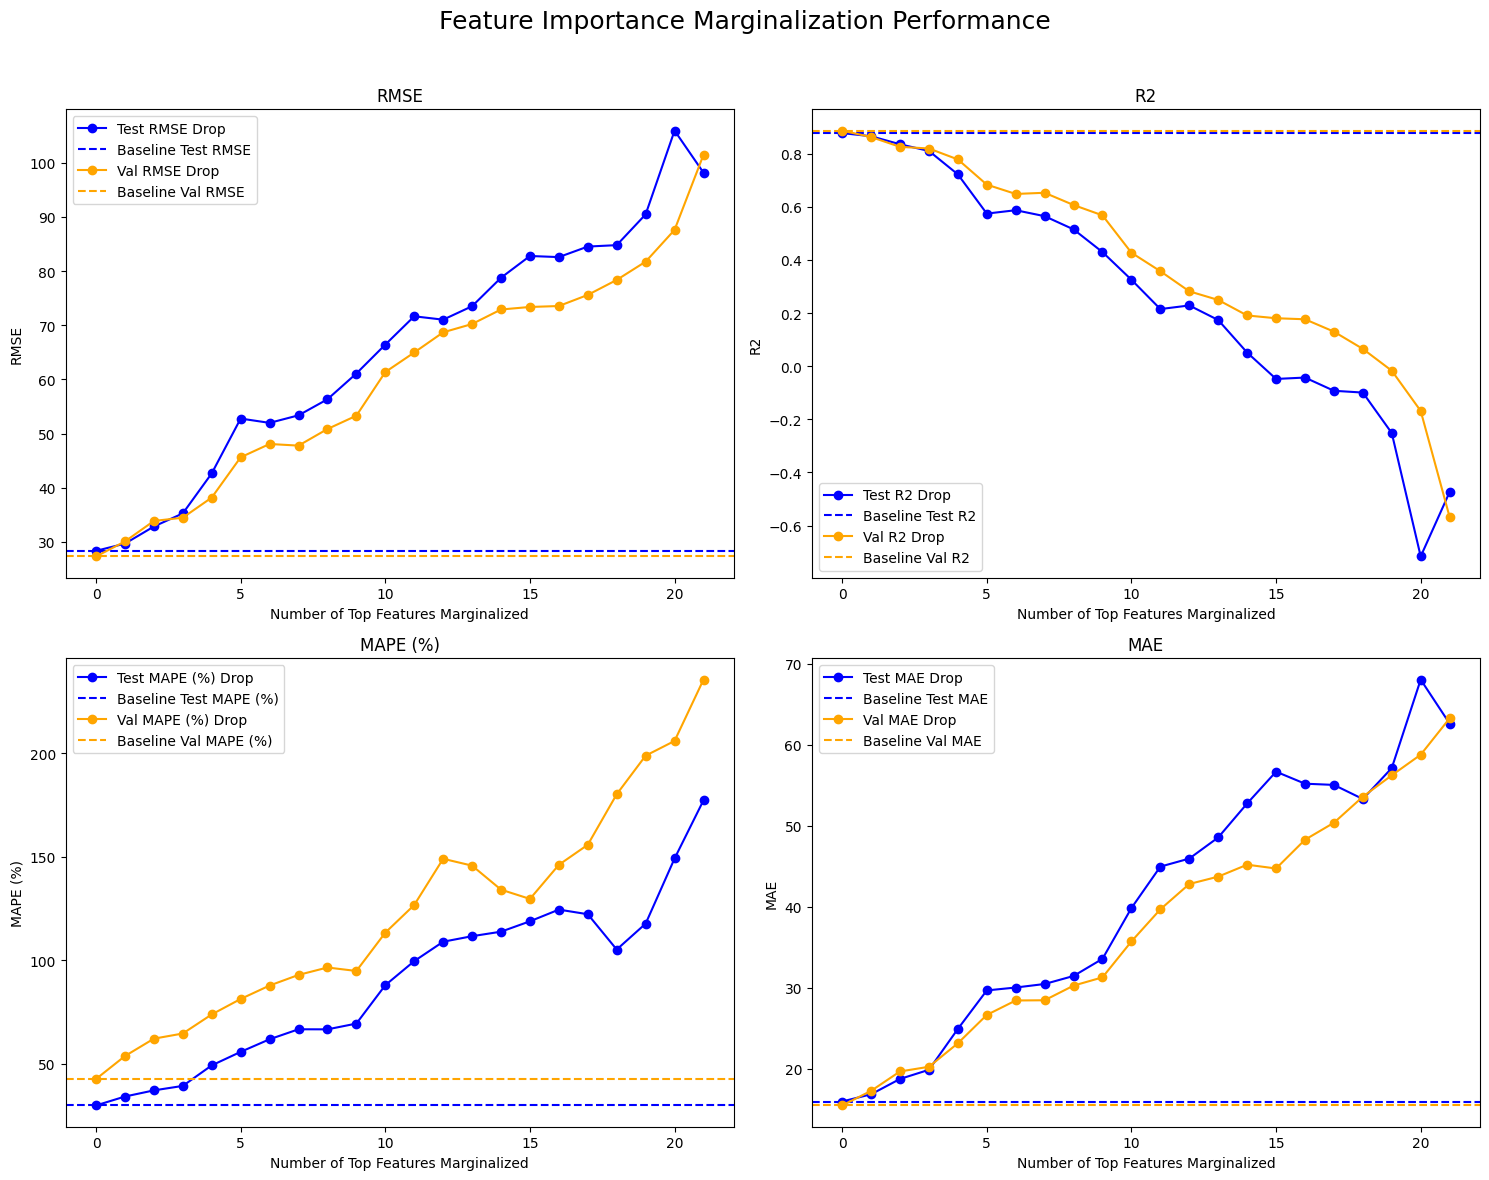

In [75]:
# Feature importance sorting
feature_importances = rf_model_tuned.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
X_train_sorted = X_train_final.iloc[:, sorted_indices]
X_test_sorted = X_test_final.iloc[:, sorted_indices]
X_val_sorted = X_val_final.iloc[:, sorted_indices]

# Initialize a dictionary to store performance metrics
performance_metrics = {
    'val_rmse': [],
    'val_mape': [],
    'val_mae': [],
    'val_r2': [],
    'test_rmse': [],
    'test_mape': [],
    'test_mae': [],
    'test_r2': []
}

# Iteratively remove top features and measure performance
for i in range(0, X_train_sorted.shape[1]):
    X_train_subset = X_train_sorted.iloc[:, i:]
    X_test_subset = X_test_sorted.iloc[:, i:]
    X_val_subset = X_val_sorted.iloc[:, i:]

    # Retrain model with remaining features
    model = rf_model_tuned
    model.fit(X_train_subset, y_train_next_year)

    # Predict and evaluate performance for validation data
    y_val_pred = model.predict(X_val_subset)
    val_rmse = np.sqrt(mean_squared_error(y_val_next_year, y_val_pred))
    val_r2 = r2_score(y_val_next_year, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val_next_year, y_val_pred) * 100
    val_mae = mean_absolute_error(y_val_next_year, y_val_pred)

    # Append validation metrics to the dictionary
    performance_metrics['val_rmse'].append(val_rmse)
    performance_metrics['val_r2'].append(val_r2)
    performance_metrics['val_mape'].append(val_mape)
    performance_metrics['val_mae'].append(val_mae)

    # Predict and evaluate performance for test data
    y_test_pred = model.predict(X_test_subset)
    test_rmse = np.sqrt(mean_squared_error(y_test_next_year, y_test_pred))
    test_r2 = r2_score(y_test_next_year, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test_next_year, y_test_pred) * 100
    test_mae = mean_absolute_error(y_test_next_year, y_test_pred)

    # Append test metrics to the dictionary
    performance_metrics['test_rmse'].append(test_rmse)
    performance_metrics['test_r2'].append(test_r2)
    performance_metrics['test_mape'].append(test_mape)
    performance_metrics['test_mae'].append(test_mae)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Feature Importance Marginalization Performance", fontsize=18)

metrics = ['rmse', 'r2', 'mape', 'mae']
titles = ['RMSE', 'R2', 'MAPE (%)', 'MAE']
colors = ['blue', 'orange']
sets = ['test', 'val']

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)

    best_test_index = np.argmin(performance_metrics[f'test_{metric}']) if metric != 'r2' else np.argmax(performance_metrics[f'test_{metric}'])
    best_val_index = np.argmin(performance_metrics[f'val_{metric}']) if metric != 'r2' else np.argmax(performance_metrics[f'val_{metric}'])

    for j, dataset in enumerate(sets):
        y_values = performance_metrics[f'{dataset}_{metric}']
        ax[row, col].plot(range(0, X_train_sorted.shape[1]), y_values, marker='o', label=f'{dataset.capitalize()} {titles[i]} Drop', color=colors[j])
        ax[row, col].axhline(y=y_values[0], linestyle='--', label=f'Baseline {dataset.capitalize()} {titles[i]}', color=colors[j])

    # Add vertical line for the best index

    ax[row, col].set_xlabel('Number of Top Features Marginalized')
    ax[row, col].set_ylabel(titles[i])
    ax[row, col].set_title(titles[i])
    ax[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('XGBoost Performance Marginalization Curves.pdf')
plt.show()

In [124]:
# # # SHAPley Value
import shap

# # get shapley values from the best model -> XGBoost
explainer_rf = shap.Explainer(rf_model_tuned)
shap_values_rf = explainer_rf.shap_values(X_test_final)



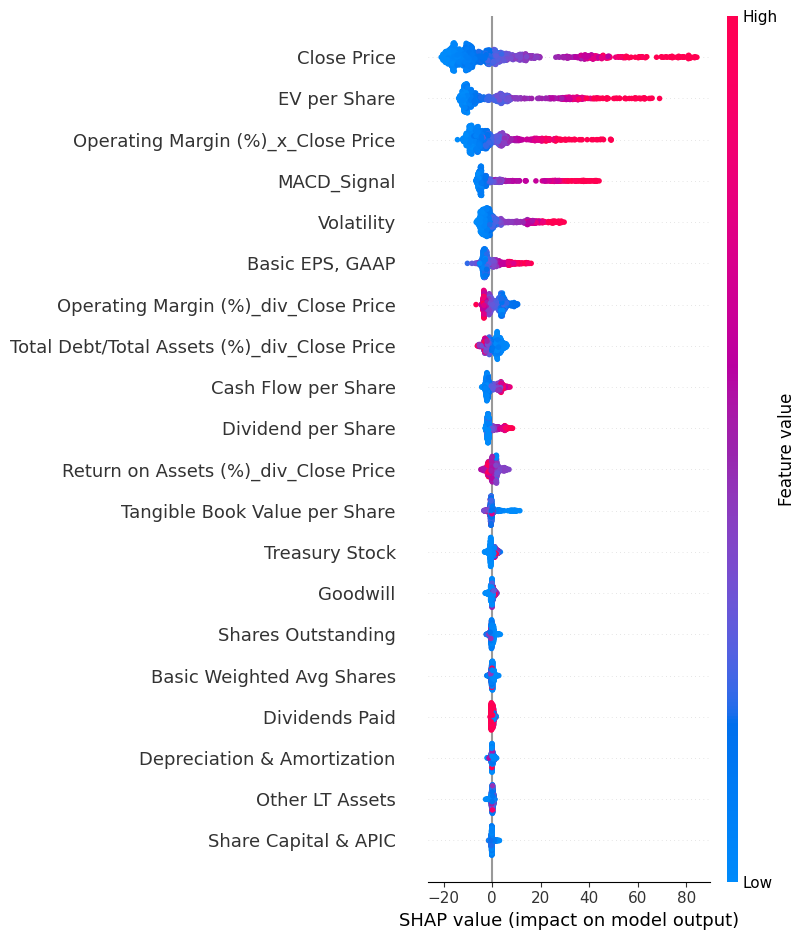

<Figure size 640x480 with 0 Axes>

In [125]:
shap.summary_plot(shap_values_rf, X_test_final)
%matplotlib inline
#save plot
plt.savefig("shap_summary_plot.png")

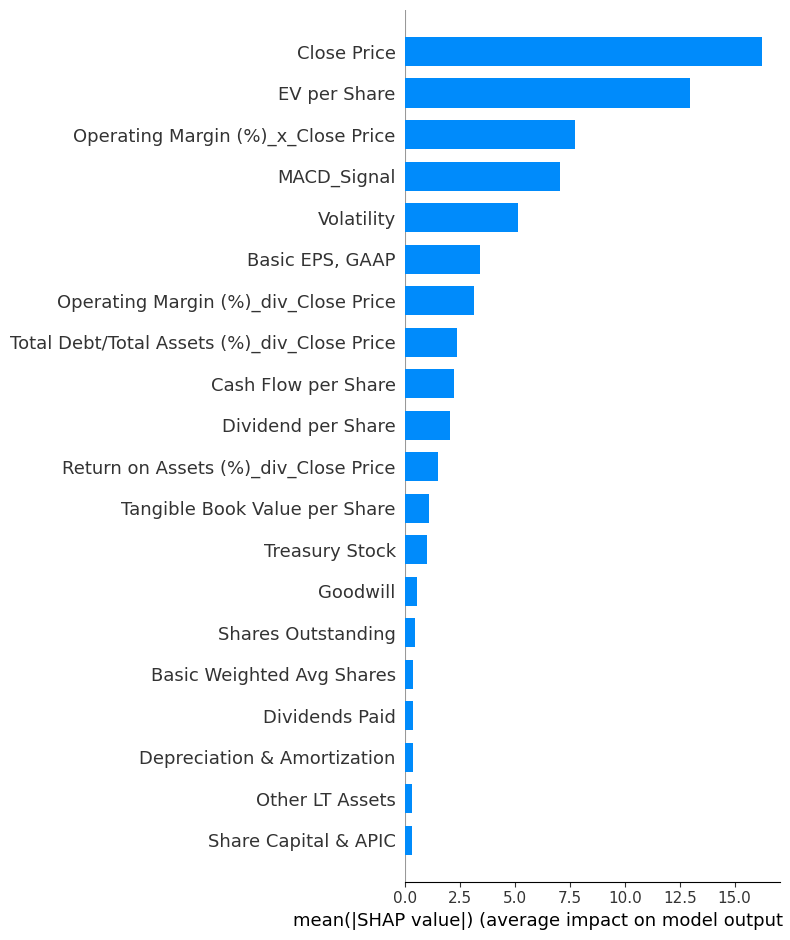

In [126]:
# Create a bar plot for feature importance
shap.summary_plot(shap_values_rf, X_test_final, plot_type="bar")

# Save the plot to a PDF
plt.savefig('shap_bar_plot.pdf', format='pdf', bbox_inches='tight')
plt.close()


In [ ]:
# Generate a force plot for a specific prediction
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb.values[0, :], X_test_final.iloc[0, :])

# Save as an HTML file
shap.save_html('shap_force_plot.html', shap.force_plot(explainer_xgb.expected_value, shap_values_xgb.values[0, :], X_test_final.iloc[0, :]))

# Convert HTML to PDF (requires pdfkit or wkhtmltopdf installed)
!pip install pdfkit
import pdfkit
pdfkit.from_file('shap_force_plot.html', 'shap_force_plot.pdf')
